In [1]:
pwd

'/mnt/USB_HDD_1TB/GitHub/keyhandshapediscovery/ipynb'

In [2]:
cd ..

/mnt/USB_HDD_1TB/GitHub/keyhandshapediscovery


In [3]:
import scriptFile as sf
import importlib as impL
import helperFuncs as funcH
import projRelatedHelperFuncs as prHF
import os
import numpy as np
import matplotlib.pyplot as plt
os.getcwd()

Using TensorFlow backend.


'/mnt/USB_HDD_1TB/GitHub/keyhandshapediscovery'

In [9]:
import torch
import os
import helperFuncs as funcH
from pandas import DataFrame as pd_df
from sklearn.metrics import confusion_matrix
impL.reload(prHF)

figsize=(8,3) 
dpi=360

cf_int = 543
impL.reload(funcH)
experiments_folder = funcH.directory_find('cf{:d}'.format(cf_int), root=funcH.getVariableByComputerName('data_dir'))
print(experiments_folder)

# update_centroid_df
# analyze_correspondance_results
# map_predictions
# _cumsum_preds - prHF.cumsum_preds
# calc_tup_sc - prHF.calc_tup_sc

search went up by 0</media/doga/SSD258/DataPath>
/media/doga/SSD258/DataPath/vaesae_experiments_cor/exp_conv_ae_simple_is256_cf543


10
dict_keys(['epoch0009', 'epoch0014', 'epoch0019', 'epoch0024', 'epoch0029', 'epoch0034', 'epoch0039', 'epoch0044', 'epoch0049', 'epoch0054'])
dict_keys(['silhouette_values', 'silhouette_avg', 'reconstruction_loss', 'correspondance_weights', 'predictions', 'labels', 'correspondance_tuple', 'kluster_centroids'])
general_acc_for(sil_sort): 0.9512542022239462
max_run_acc(1.0000), at 0(%0.00)
[0.03703704 0.03703704 0.03703704 ... 1.         1.         1.        ]
general_acc_for(rec_sort): 0.9512542022239462
max_run_acc(1.0000), at 0(%0.00)
[0.03703704 0.03703704 0.03703704 ... 1.         1.         1.        ]
general_acc_for(sr_sort): 0.9512542022239462
max_run_acc(1.0000), at 0(%0.00)
[0.03703704 0.03703704 0.03703704 ... 1.         1.         1.        ]


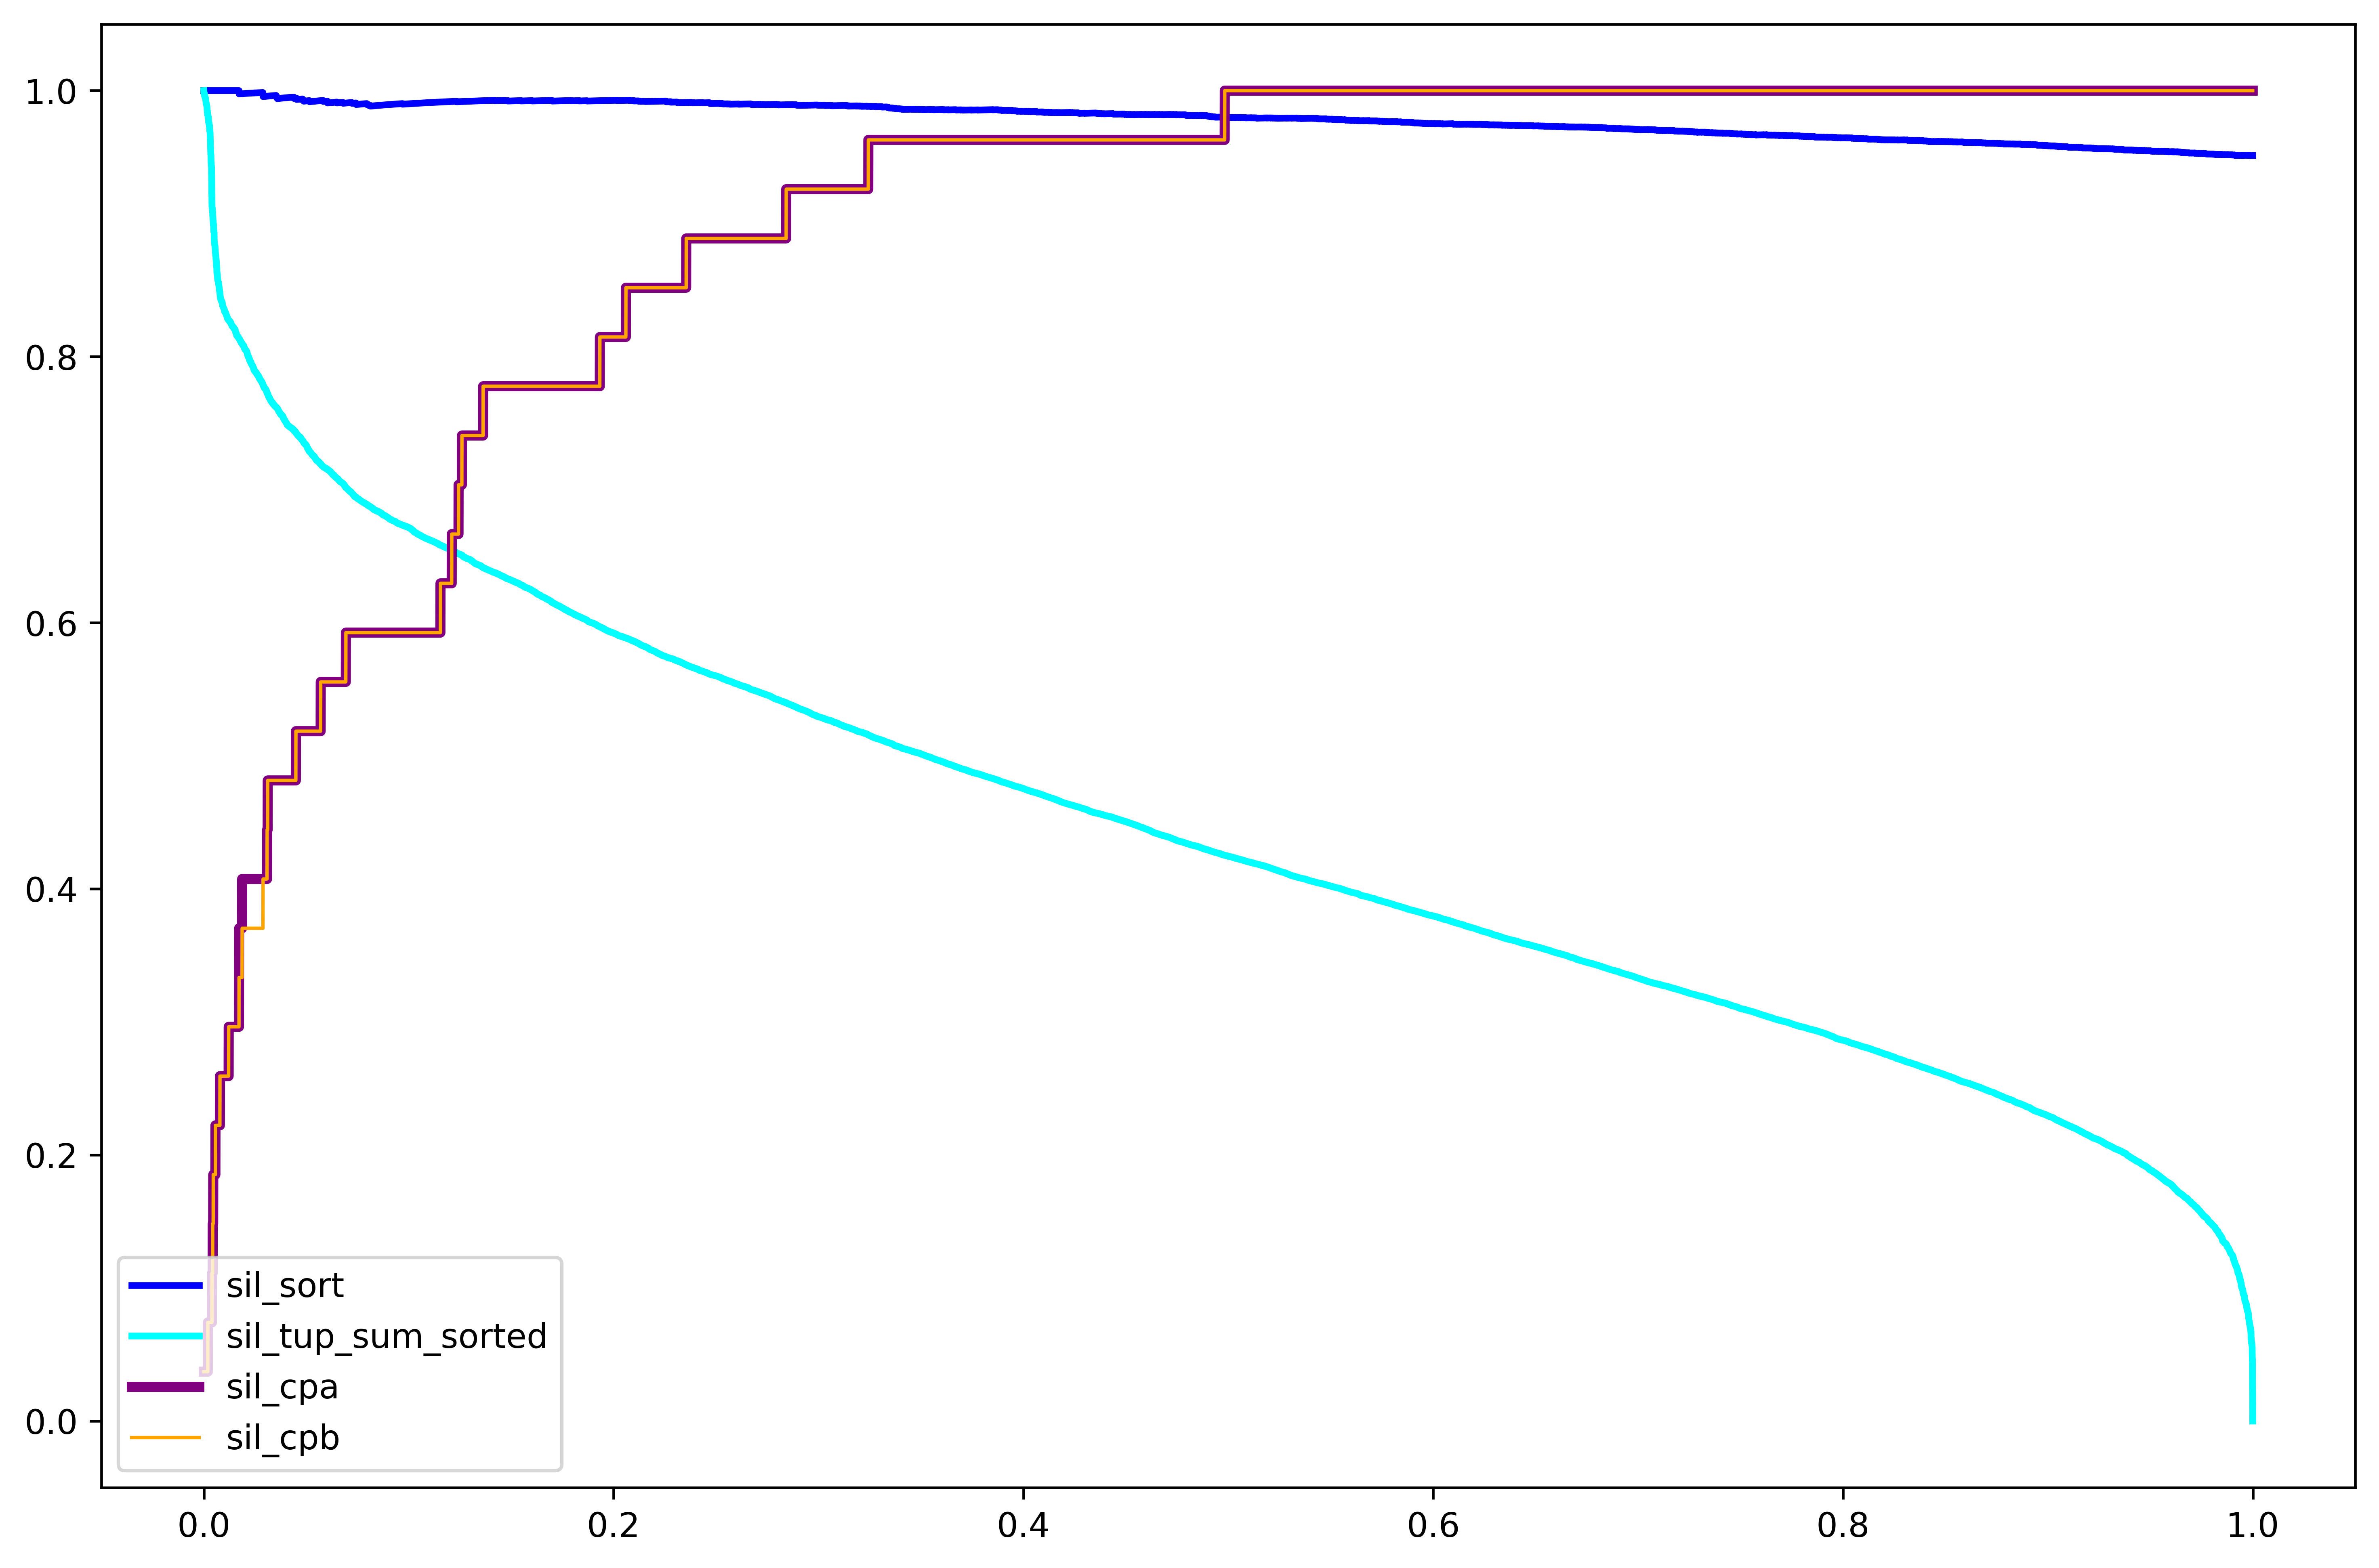

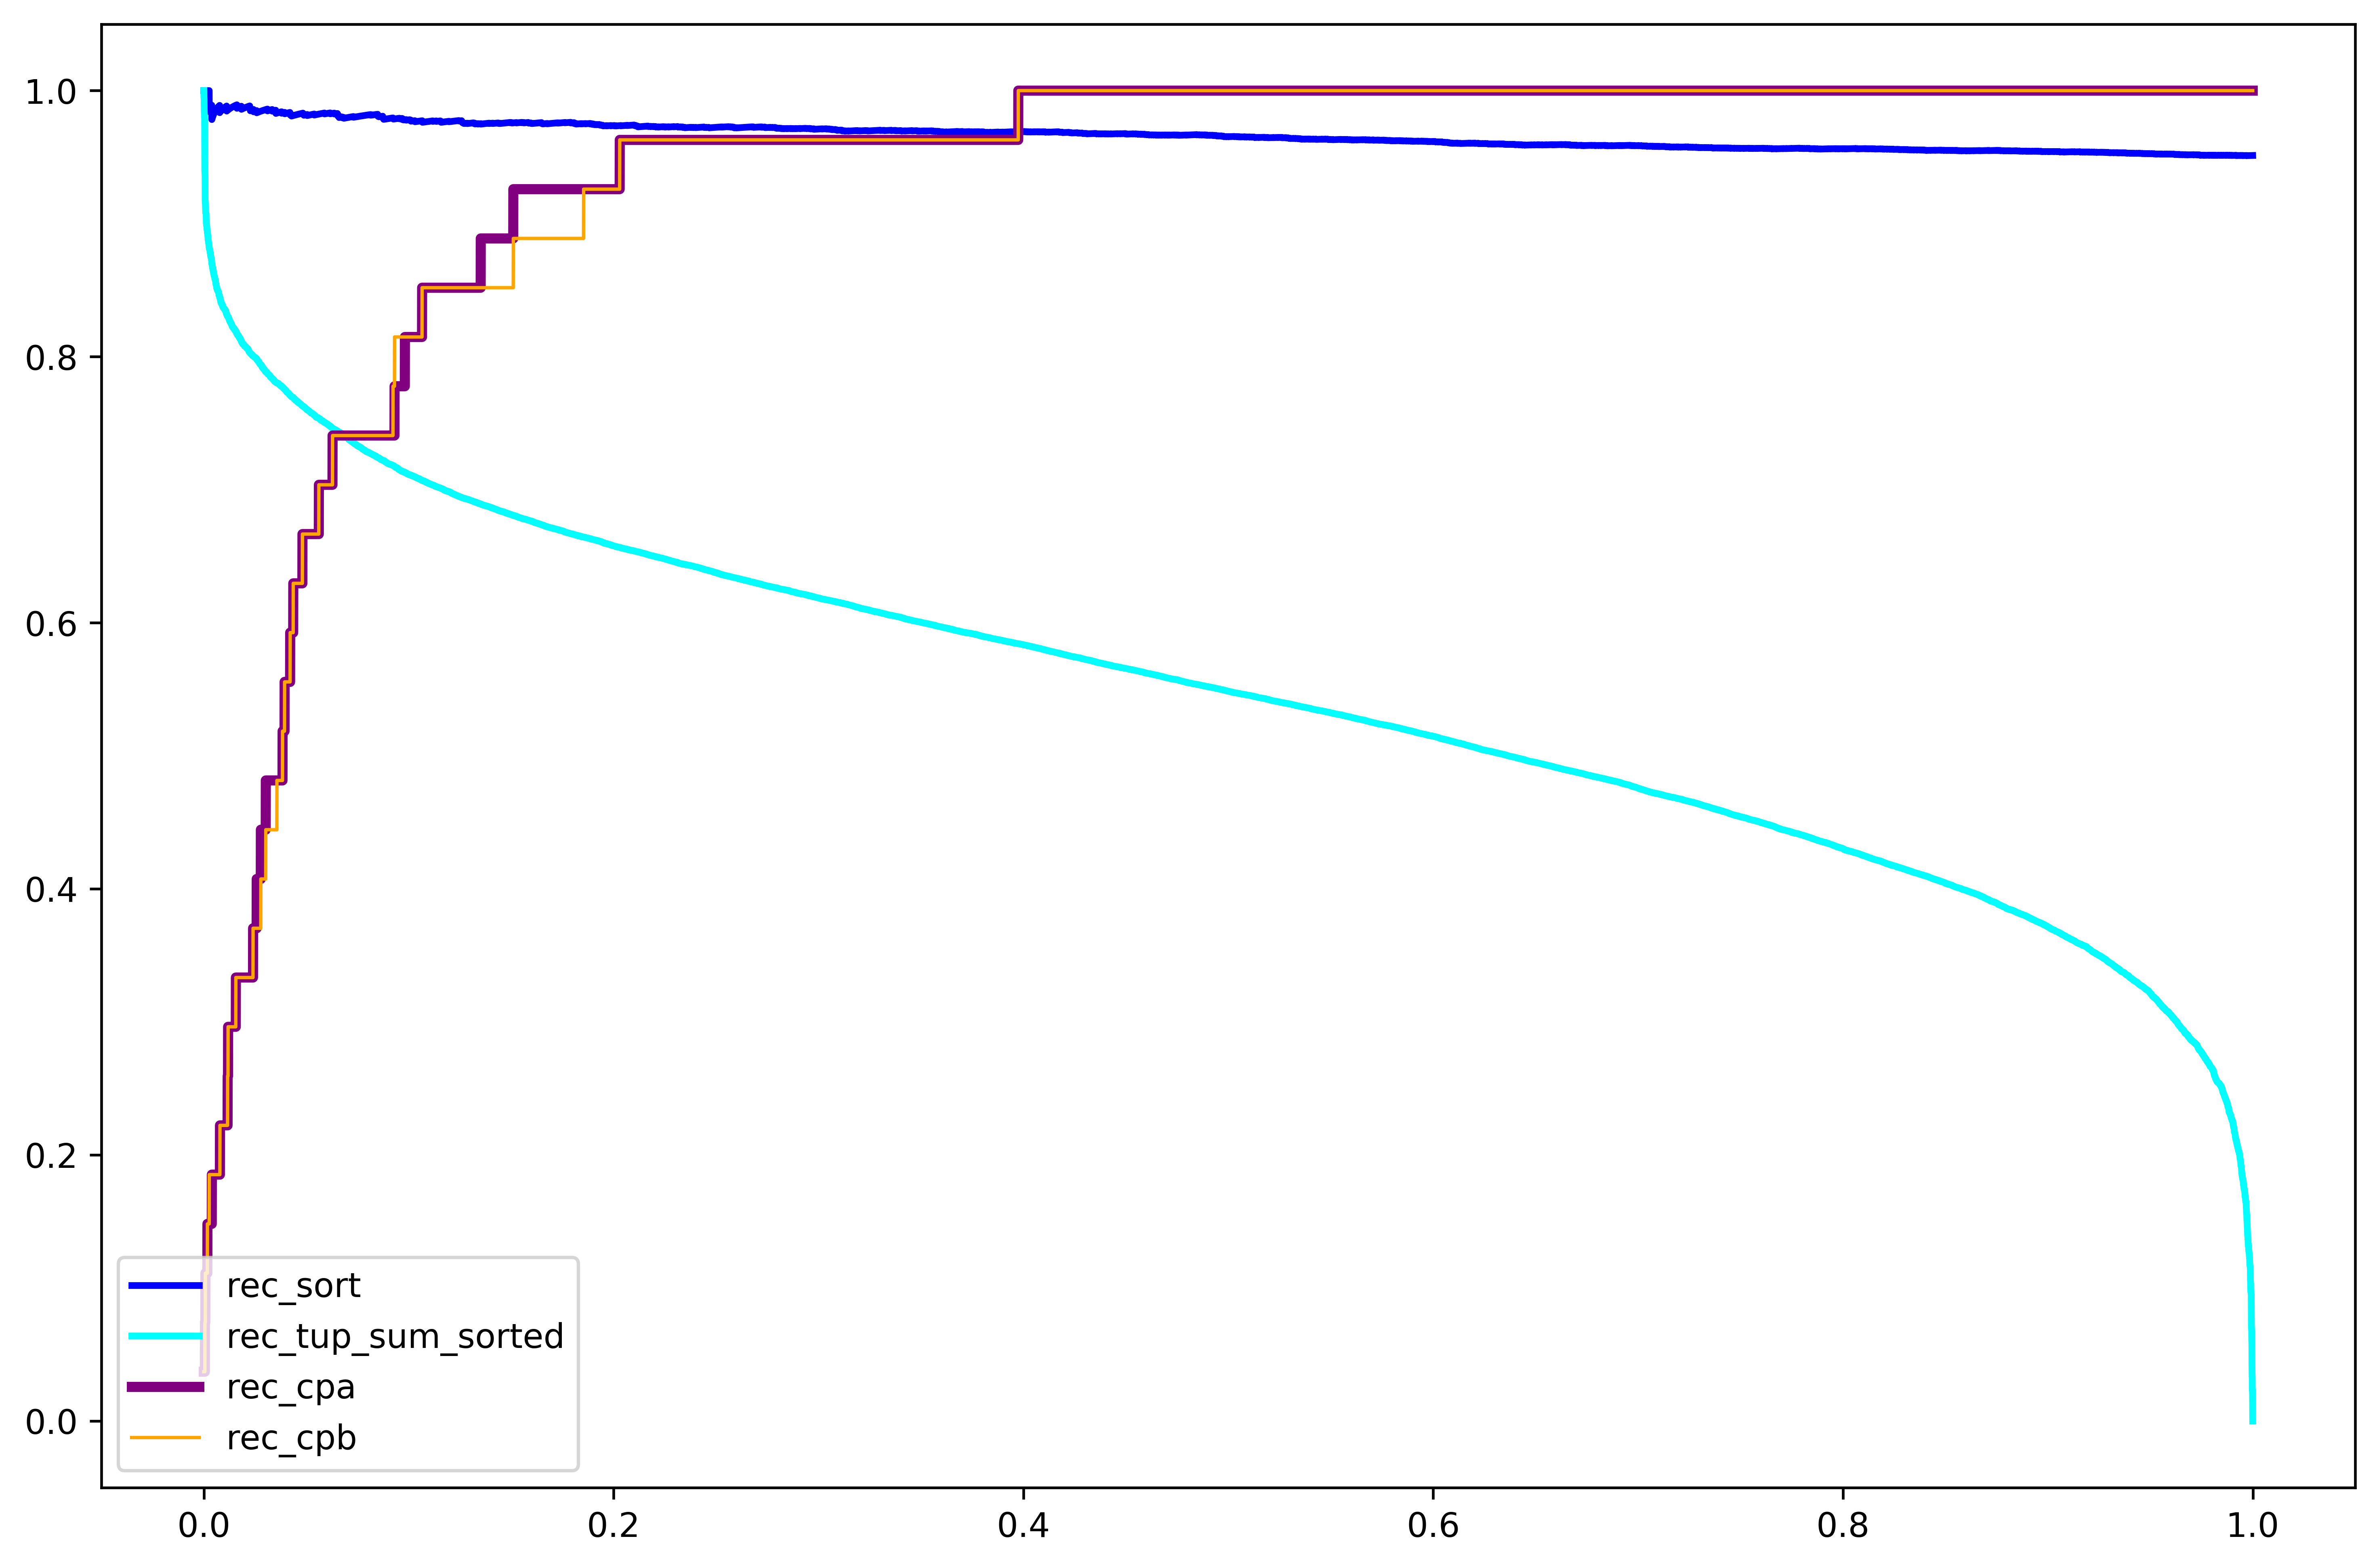

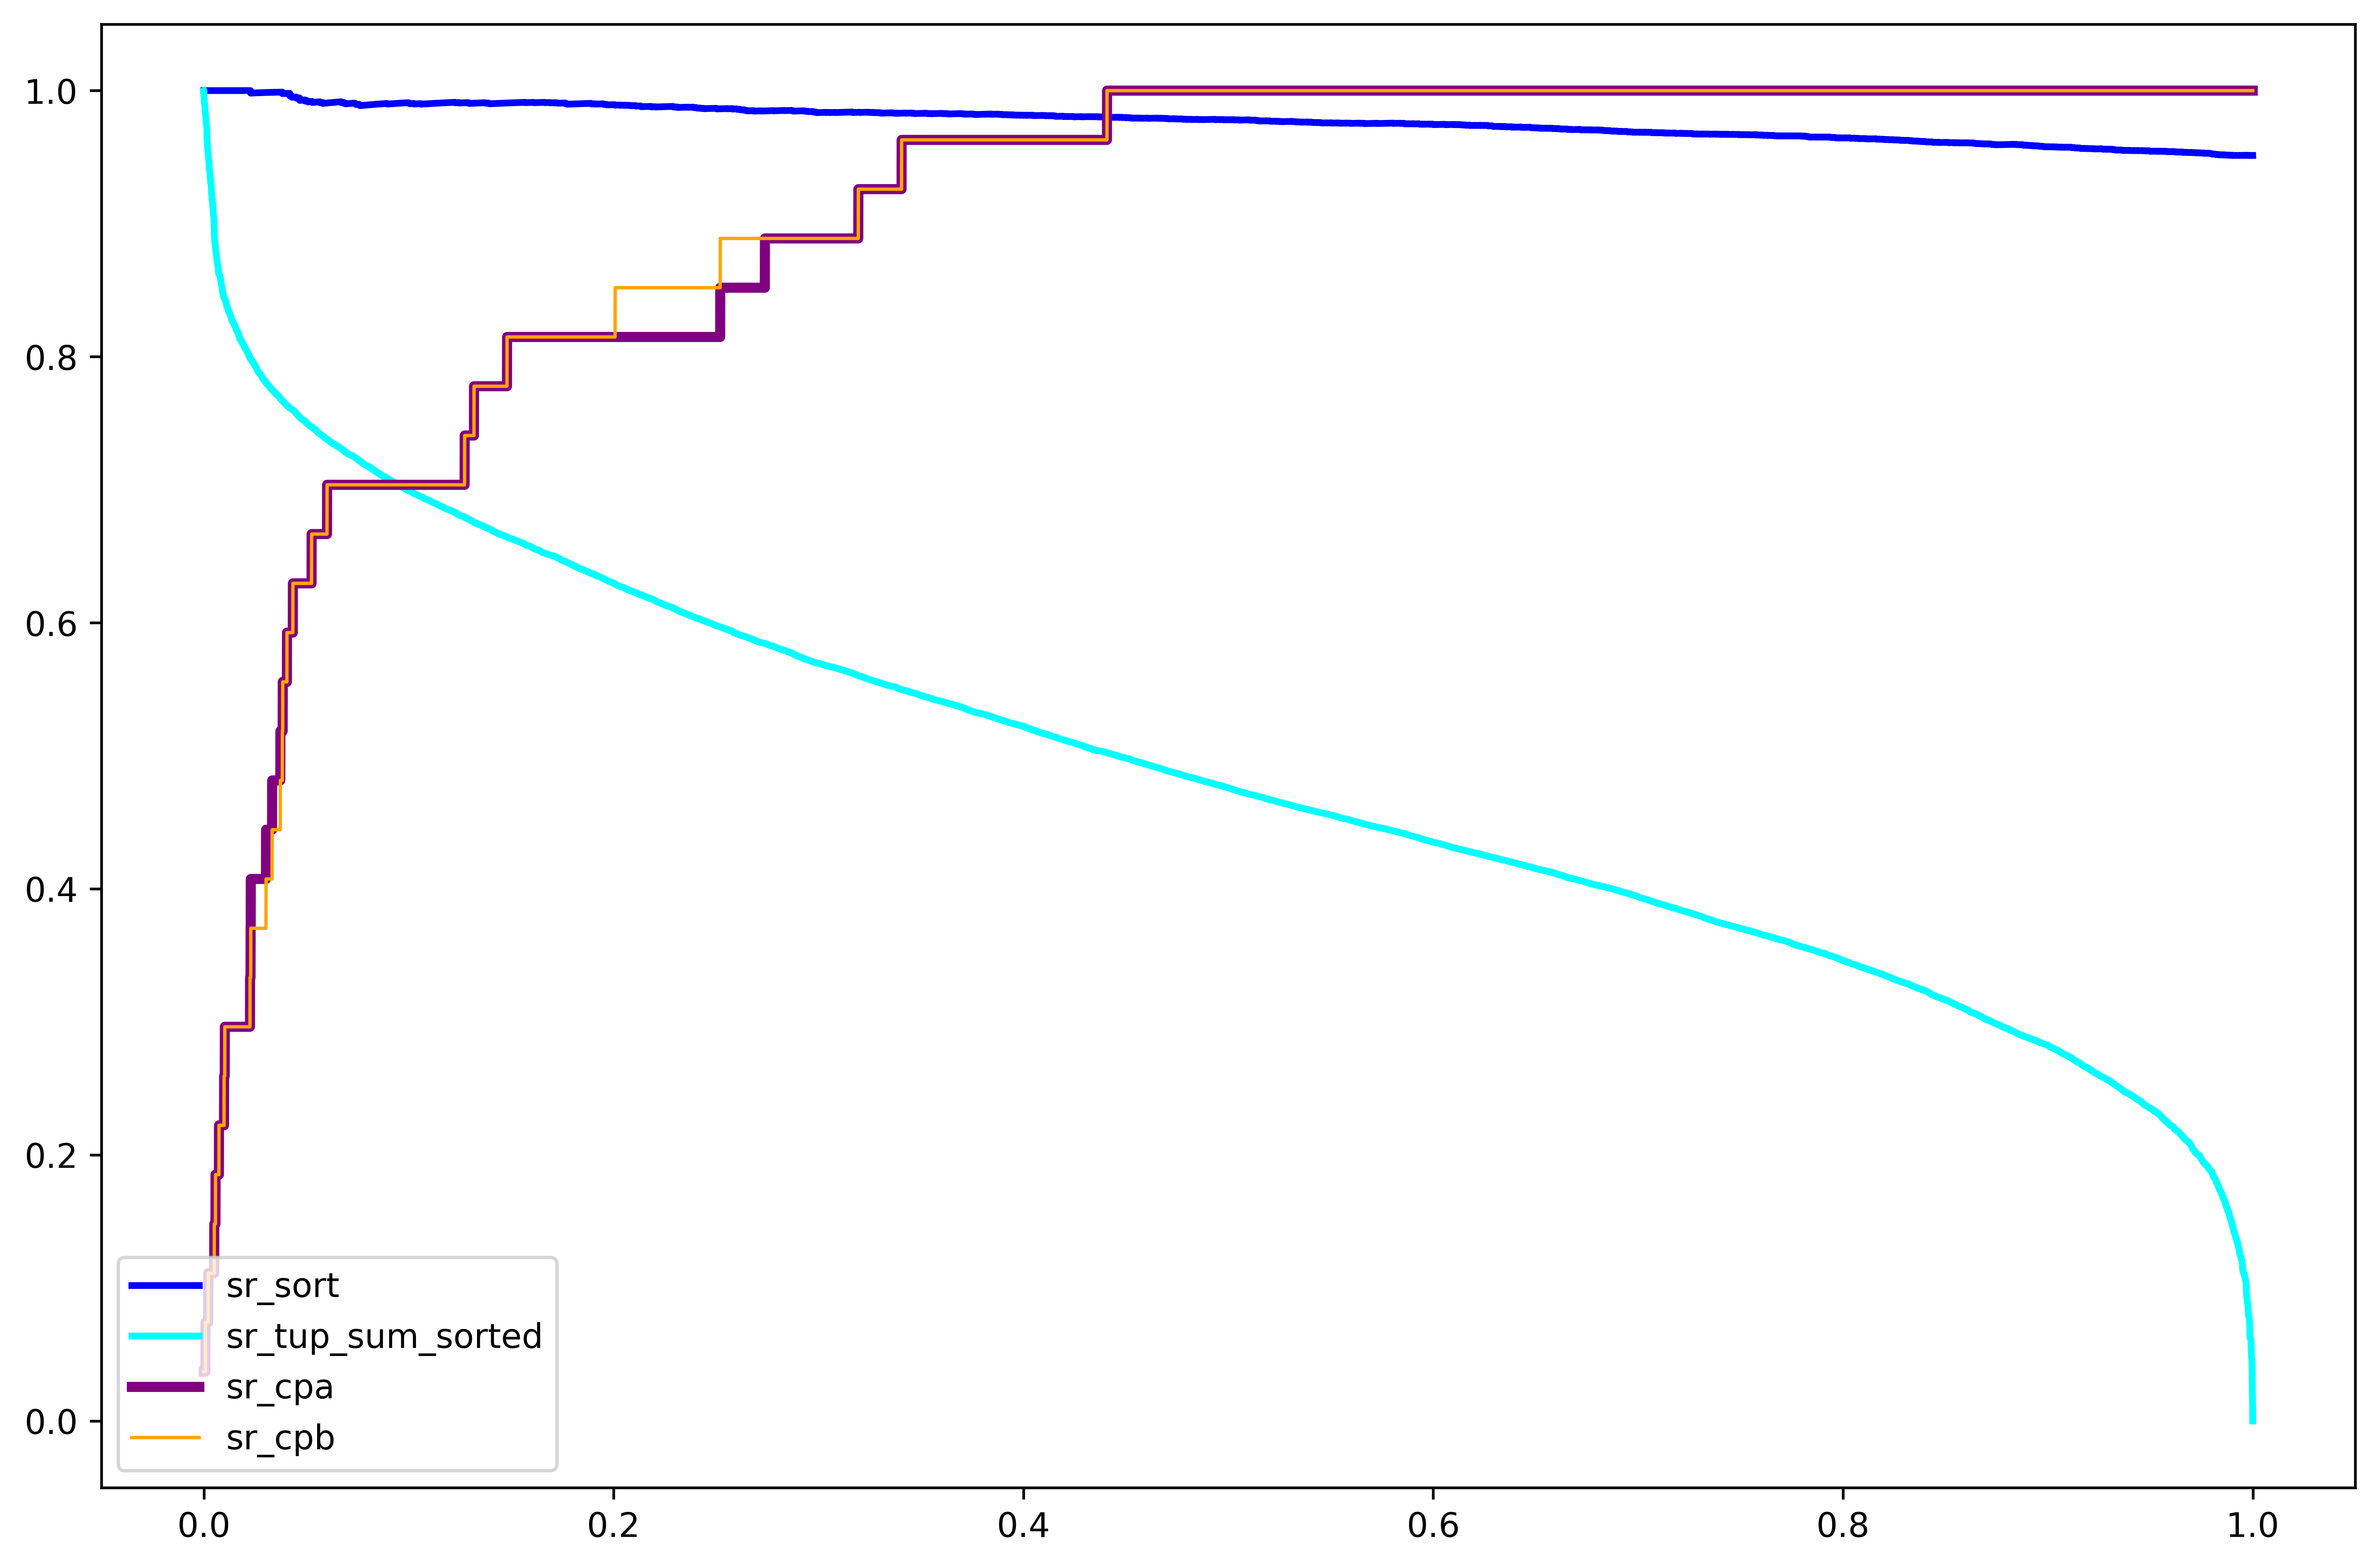

*-*-*Saving(/media/doga/SSD258/DataPath/vaesae_experiments_cor/exp_conv_ae_simple_is256_cf543/plots/compare009_0.9511.jpeg)


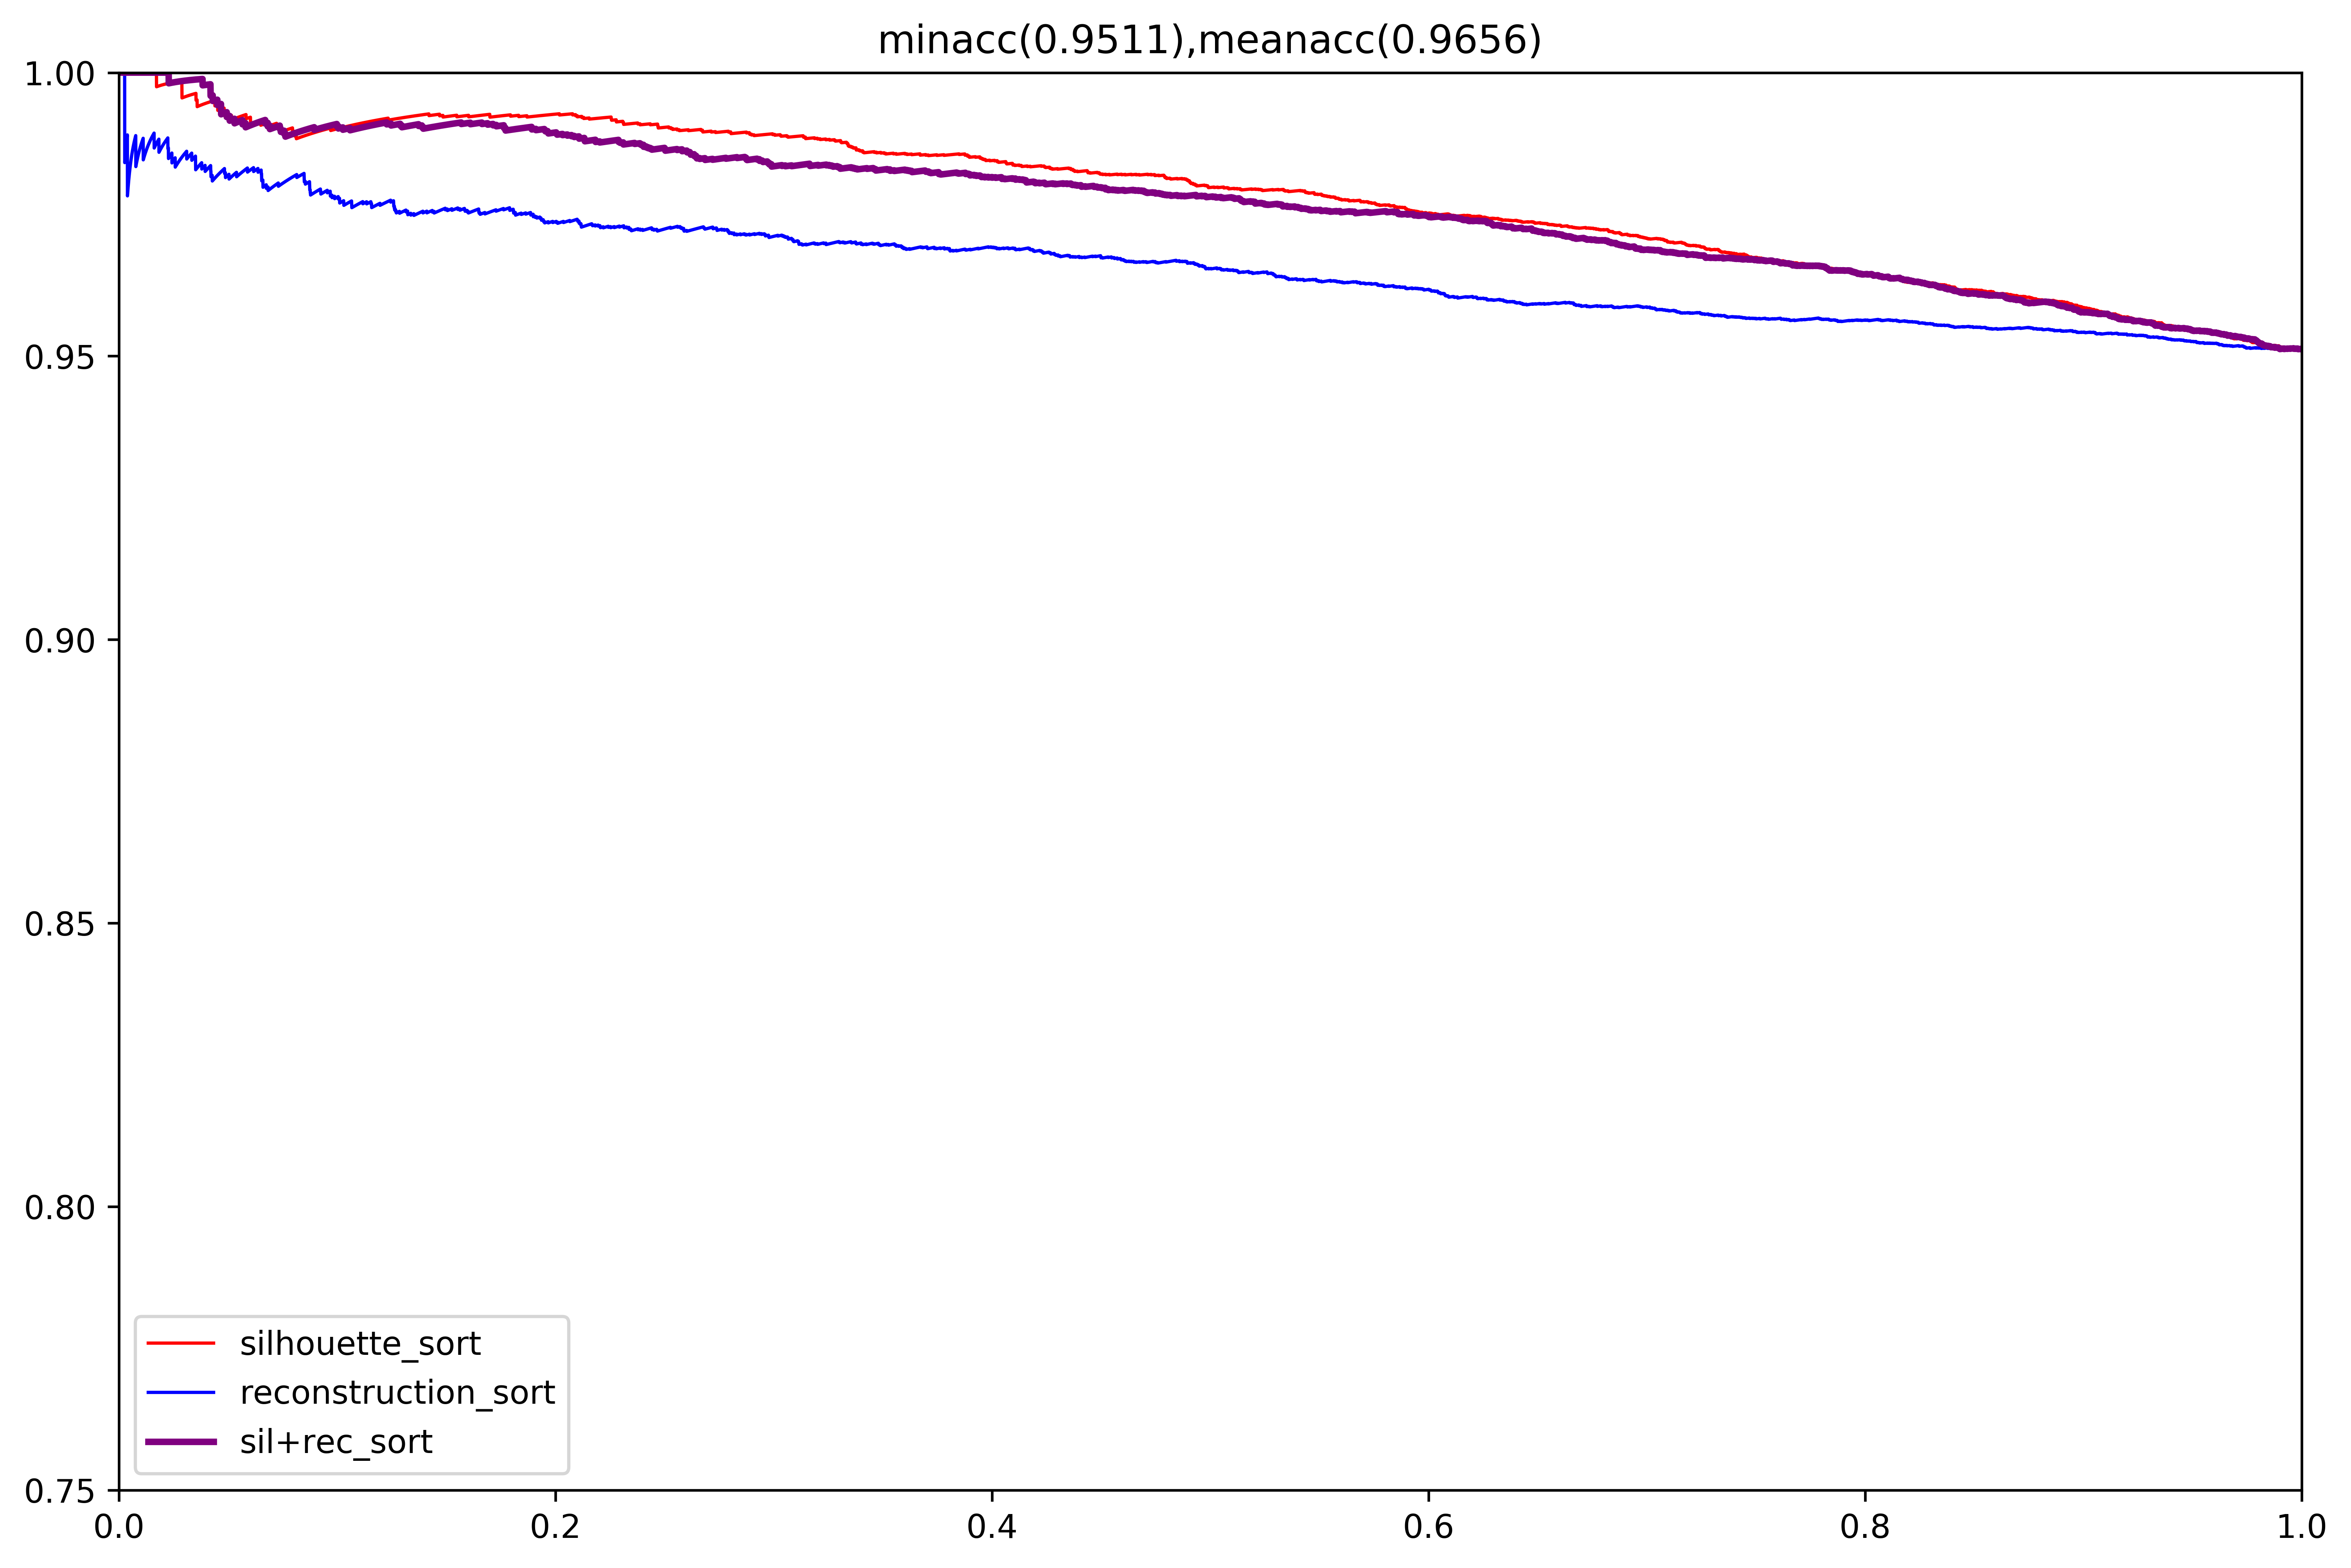

In [12]:
impL.reload(prHF)
def get_epoch(ep_str):
    print(sil_var[ep_str].keys())
    silhouette_values = sil_var[ep_str]["silhouette_values"]
    silhouette_avg = sil_var[ep_str]["silhouette_avg"]
    reconstruction_loss = sil_var[ep_str]["reconstruction_loss"]
    correspondance_weights = sil_var[ep_str]["correspondance_weights"]
    sil_var[ep_str]["predictions"] = np.asarray(sil_var[ep_str]["predictions"],dtype=int)
    labels = sil_var[ep_str]["labels"]
    correspondance_tuple = sil_var[ep_str]["correspondance_tuple"]
    kluster_centroids = sil_var[ep_str]["kluster_centroids"]
    return sil_var[ep_str]

exp_fold = experiments_folder
silhouette_reconstruction_sort_file = os.path.join(exp_fold, "silhouette_reconstruction.torch")
sil_var = torch.load(silhouette_reconstruction_sort_file, map_location=torch.device('cpu'))
print(len(sil_var))
print(sil_var.keys())
if False:
    for ep_str in sil_var.keys():
        _evs = get_epoch(ep_str=ep_str)
        epoch_id = int(ep_str.replace("epoch", ""))
        prHF.calc_tup_sc(_evs["silhouette_values"], _evs["reconstruction_loss"], 
                         _evs["correspondance_tuple"], _evs["labels"], 
                         ep_id=epoch_id, experiments_folder=exp_fold)
else:
    _evs = get_epoch(ep_str='epoch0009')
    epoch_id = 9
    prHF.calc_tup_sc(_evs["silhouette_values"], _evs["reconstruction_loss"], 
                     _evs["correspondance_tuple"], _evs["labels"], 
                     ep_id=epoch_id, experiments_folder=exp_fold)

In [14]:
kluster_centroids = prHF.update_centroid_df(_evs["kluster_centroids"], _evs["predictions"])
prHF.analyze_correspondance_results(_evs["correspondance_tuple"], _evs["kluster_centroids"], _evs["predictions"], _evs["labels"])

AttributeError: 'NoneType' object has no attribute 'axes'

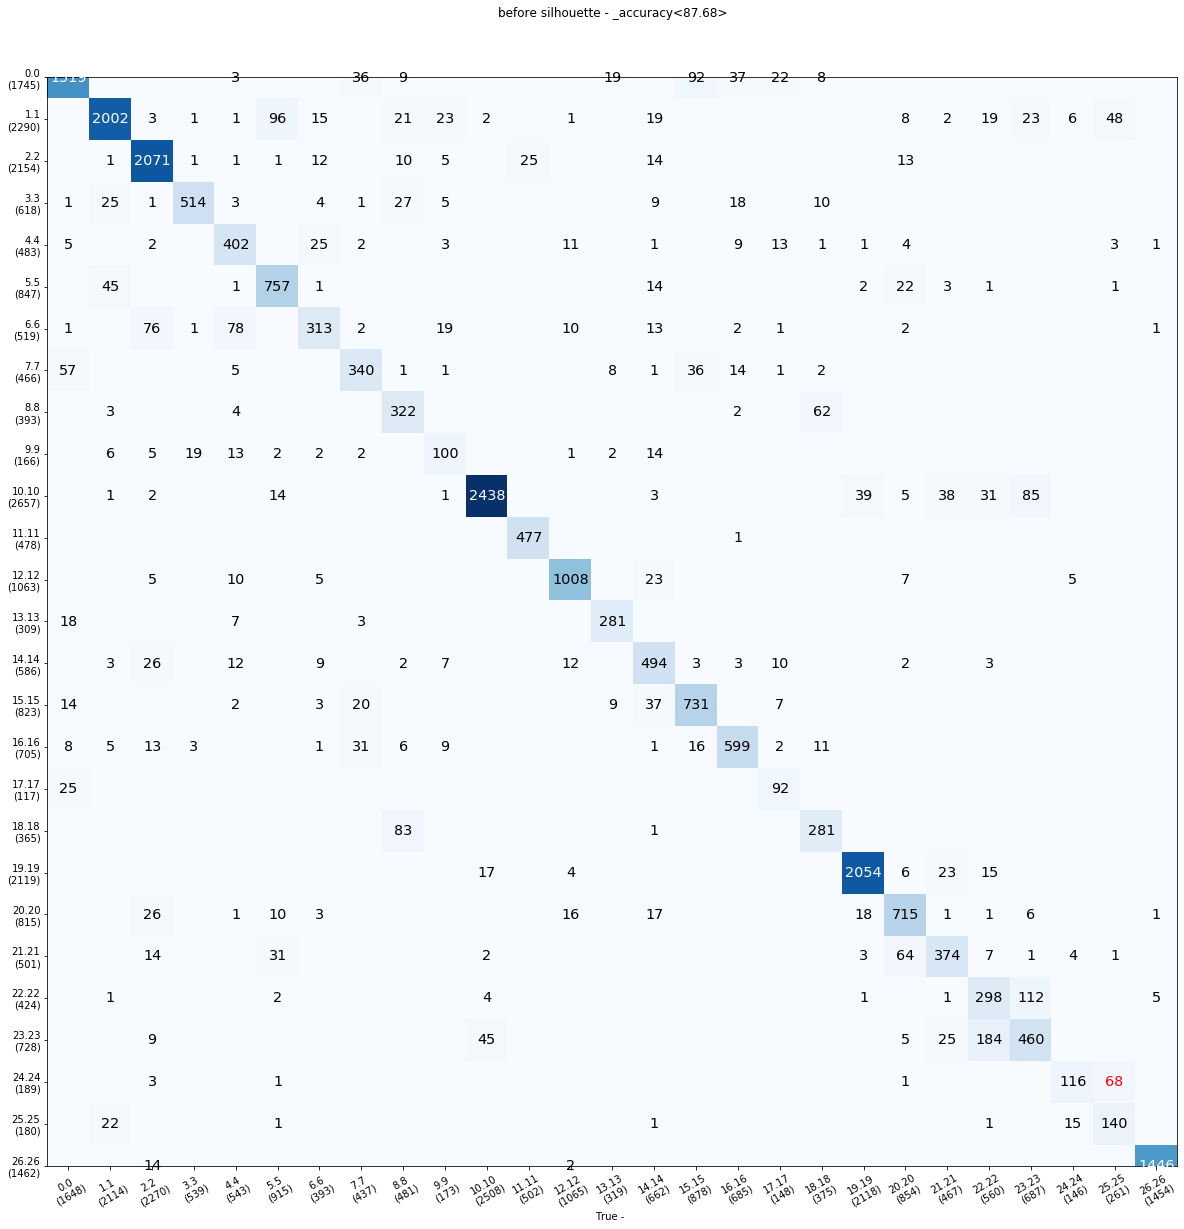

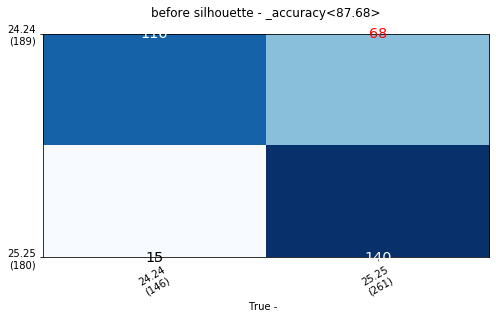

AttributeError: 'NoneType' object has no attribute 'copy'

In [16]:
result_dict = prHF.analyze_silhouette_values(_evs["silhouette_values"], _evs["predictions"], _evs["labels"],
                                    centroid_info_pdf=_evs["kluster_centroids"],
                                    label_names=None, conf_plot_save_to='',
                                    figsize=figsize, lw=[4, 3, 2], show_title=False, str_deg=15, str_size=12)

In [17]:
sil_val_sorted, sil_idx = funcH.sortVec(_evs["silhouette_values"])
rec_los_sorted, rec_idx = funcH.sortVec(-_evs["reconstruction_loss"])
rec_los_sorted_0_1 = funcH.map_0_1(-rec_los_sorted)
predictions_mapped = funcH.map_predictions(_evs["labels"], _evs["predictions"], centroid_info_pdf=_evs["kluster_centroids"])
print(np.min(rec_los_sorted), np.max(rec_los_sorted))

-87.07466 -42.917683


0.44062027

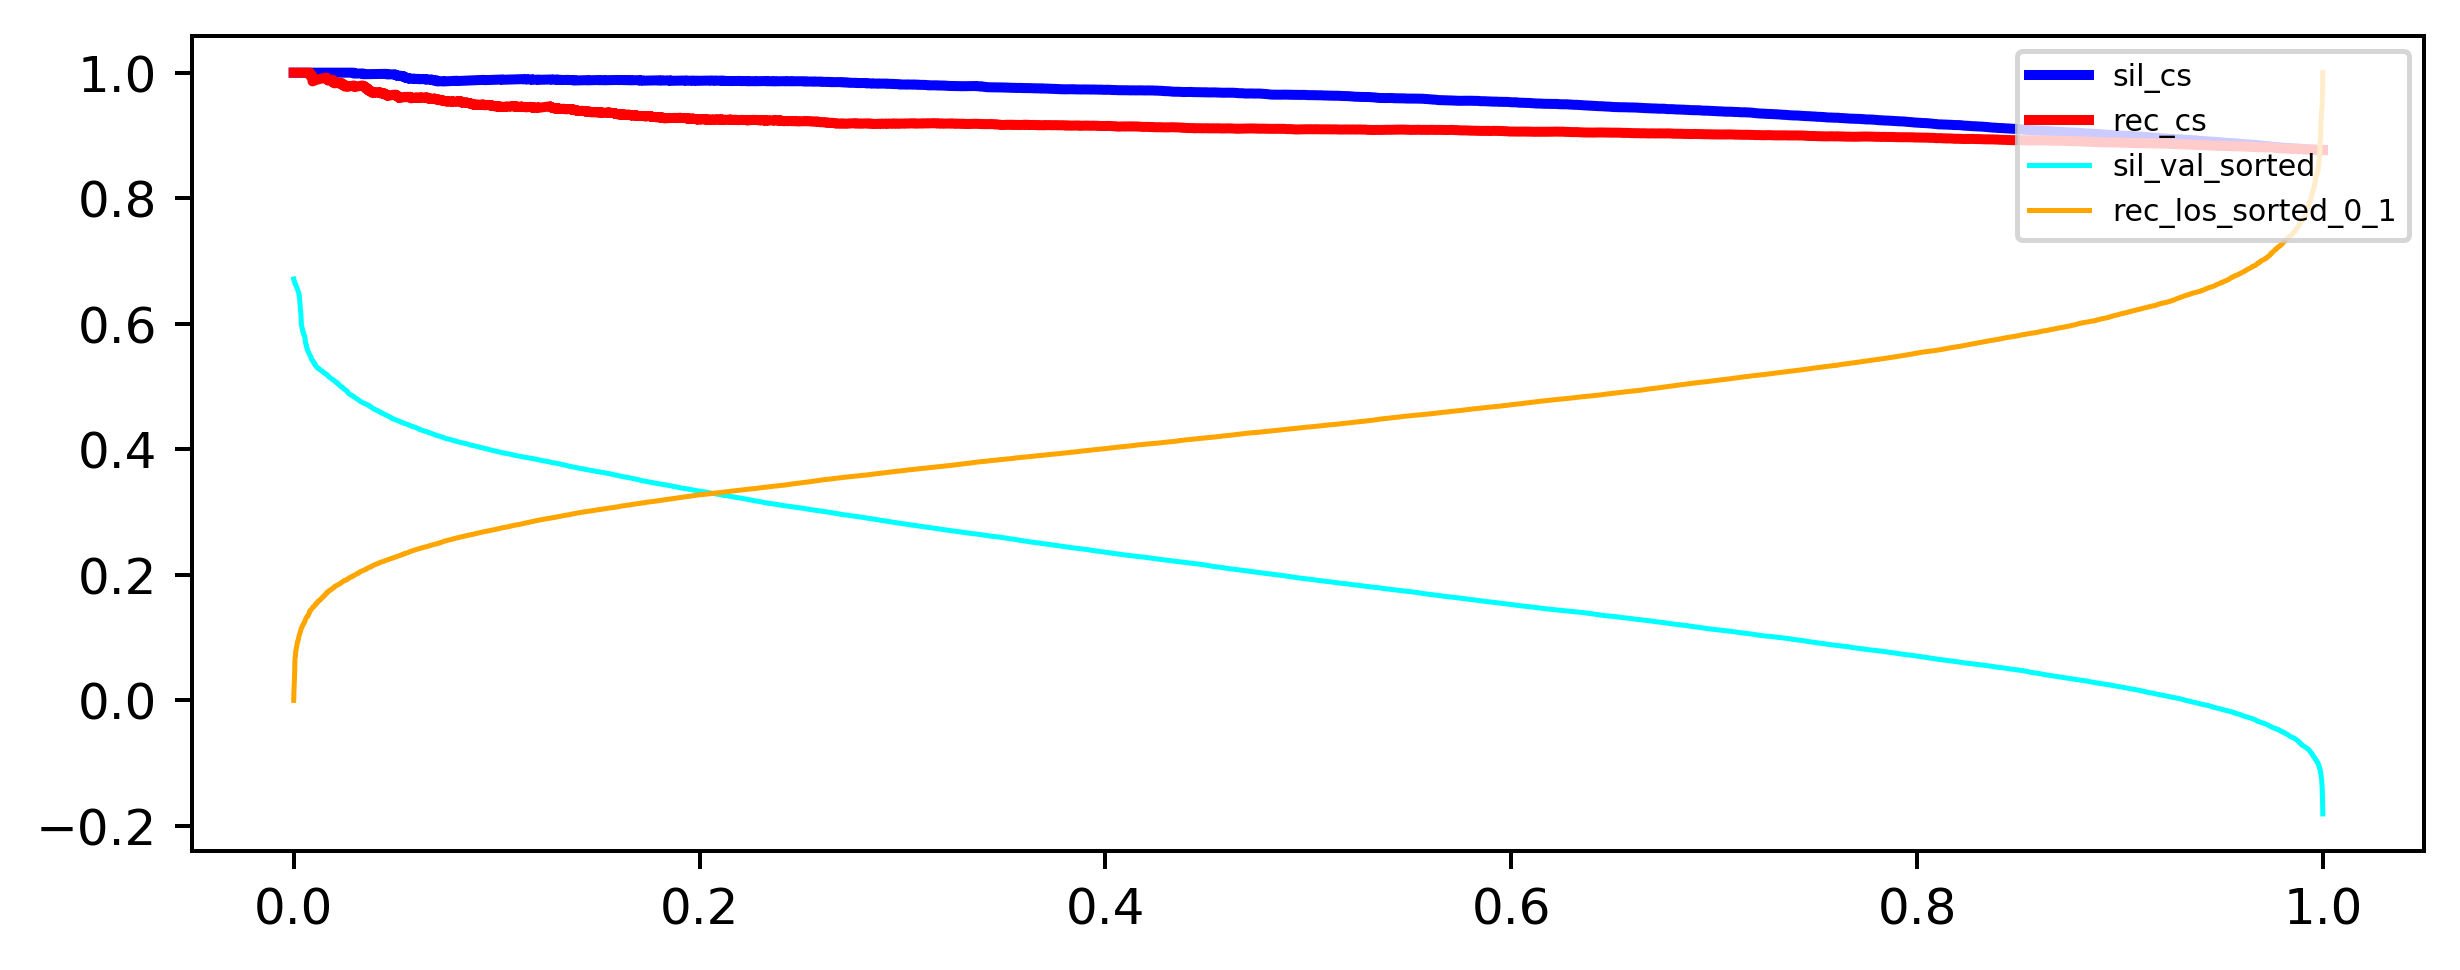

In [18]:
labels = _evs["labels"]
cumsum_preds_sil = funcH.cumsum_preds(labels, predictions_mapped, sil_idx)
cumsum_preds_rec = funcH.cumsum_preds(labels, predictions_mapped, rec_idx)
data_perc_vec = np.arange(0, len(cumsum_preds_rec)) / len(cumsum_preds_rec)

plt.close('all')
fig, ax = plt.subplots(1, figsize=figsize, dpi=dpi)
ax.plot(data_perc_vec, cumsum_preds_sil, lw=2, label='sil_cs', color='blue', ls='-', zorder=0)
ax.plot(data_perc_vec, cumsum_preds_rec, lw=2, label='rec_cs', color='red', ls='-', zorder=0)
ax.plot(data_perc_vec, sil_val_sorted, lw=1, label='sil_val_sorted', color='cyan', ls='-', zorder=0)
ax.plot(data_perc_vec, rec_los_sorted_0_1, lw=1, label='rec_los_sorted_0_1', color='orange', ls='-', zorder=0)
plt.legend(loc='upper right', prop={'size': 6})
np.mean(rec_los_sorted_0_1)

dict_keys(['silhouette_values', 'silhouette_avg', 'reconstruction_loss', 'correspondance_weights', 'predictions', 'labels', 'correspondance_tuple', 'kluster_centroids'])
/media/doga/SSD258/DataPath/vaesae_experiments_cor/exp_conv_ae_simple_is256_cf543 24
*-*-*
rec_v(0.2),at(1334),acc(97.30)
rec_v(0.3),at(4957),acc(94.01)
rec_v(0.4),at(10943),acc(90.89)
rec_v(0.5),at(17036),acc(88.91)
rec_v(0.6),at(21064),acc(86.93)
rec_v(0.7),at(22683),acc(85.99)
rec_v(0.8),at(23117),acc(85.60)
*-*-*
data_perc(0.1),at(2320),acc(95.6915)
data_perc(0.2),at(4640),acc(94.1823)
data_perc(0.3),at(6960),acc(92.8459)
data_perc(0.4),at(9280),acc(91.6388)
data_perc(0.5),at(11601),acc(90.6137)
data_perc(0.6),at(13921),acc(89.9224)
data_perc(0.7),at(16241),acc(89.2255)
data_perc(0.8),at(18561),acc(88.2664)


{'preds_sorted': array([1.        , 1.        , 1.        , ..., 0.85469828, 0.85466144,
        0.8546677 ]),
 'data_perc_vec': array([0.00000000e+00, 4.30997328e-05, 8.61994656e-05, ...,
        9.99870701e-01, 9.99913801e-01, 9.99956900e-01])}

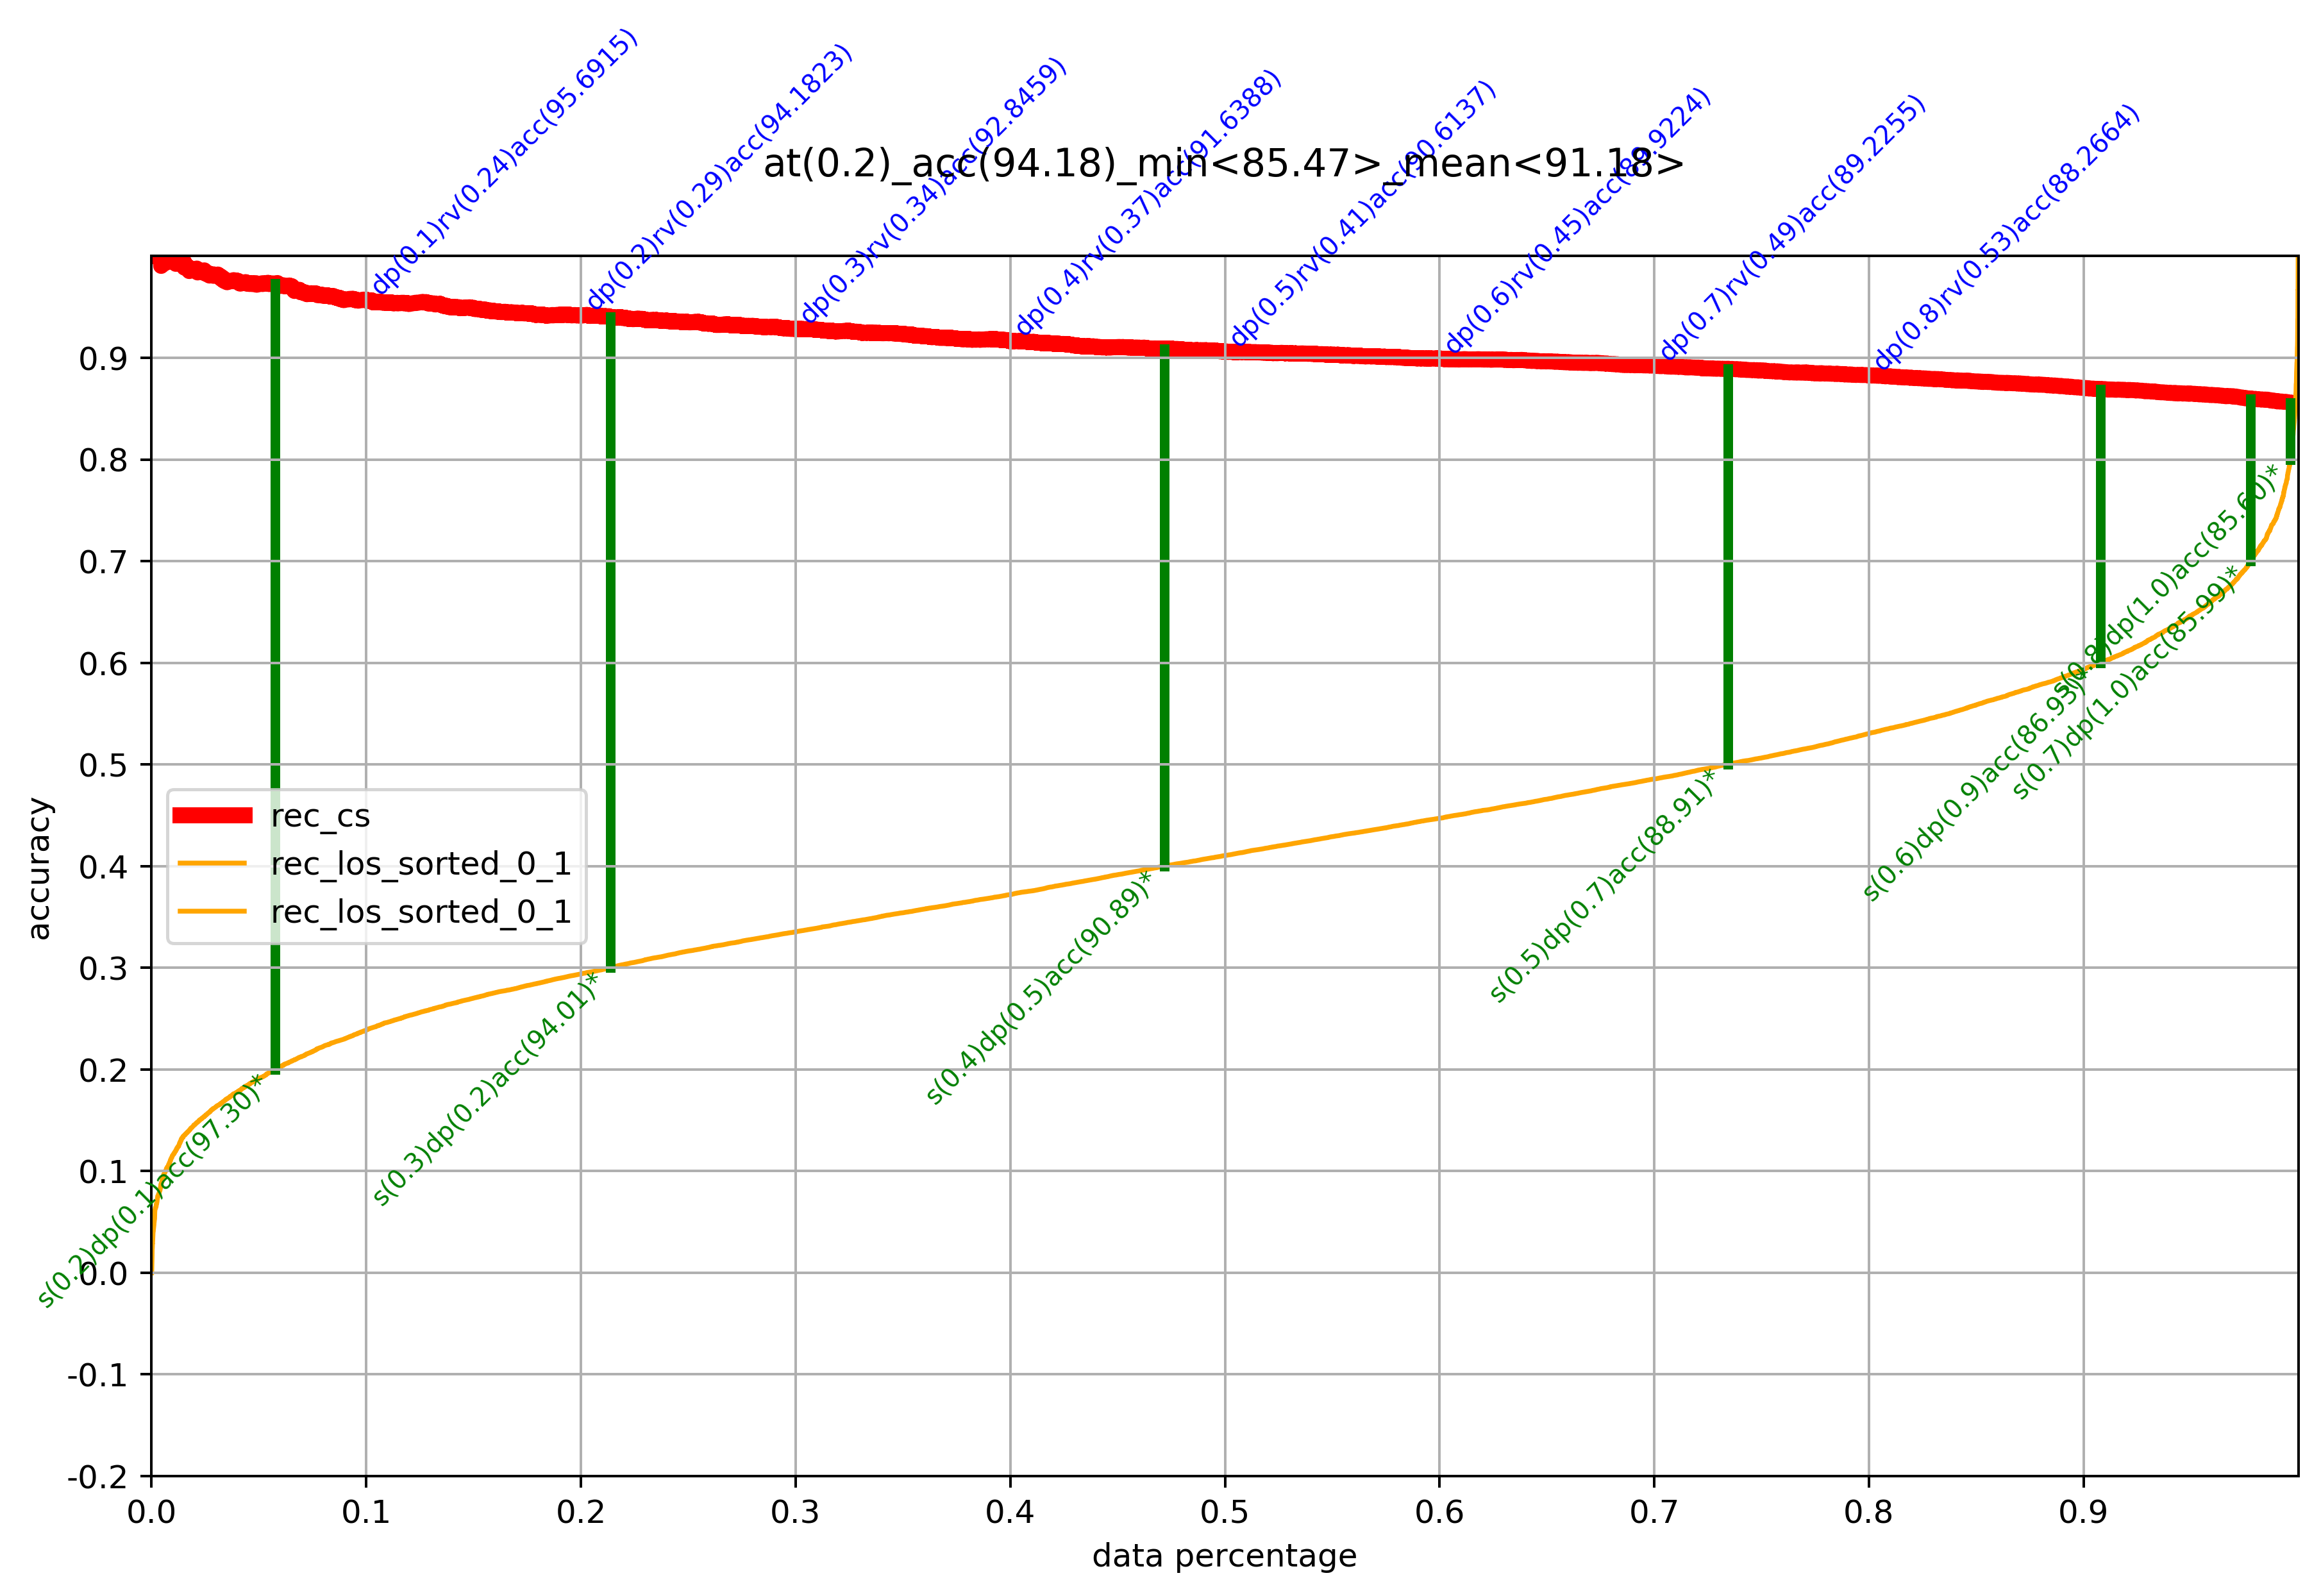

In [21]:
impL.reload(prHF)
_evs = get_epoch(ep_str='epoch0024')
epoch_id = 24
print(exp_fold, epoch_id)
save_at_file_name=os.path.join(exp_fold, "plots", "reconstruct_sort_{:03d}_ACCSTR.jpeg".format(epoch_id))
prHF.analyze_reconstruction_values(reconstruction_loss_vec=_evs["reconstruction_loss"], 
                              cluster_labels=_evs["predictions"], real_labels=_evs["labels"],
                              centroid_info_pdf=_evs["kluster_centroids"], save_at_file_name=save_at_file_name,
                              str_size=8, verbose=2)

dict_keys(['silhouette_values', 'silhouette_avg', 'reconstruction_loss', 'correspondance_weights', 'predictions', 'labels', 'correspondance_tuple', 'kluster_centroids'])
*-*-*
rec_v(0.2),at(703),acc(97.73)
rec_v(0.3),at(3307),acc(93.89)
rec_v(0.4),at(9198),acc(91.53)
rec_v(0.5),at(15719),acc(90.32)
rec_v(0.6),at(20406),acc(89.06)
rec_v(0.7),at(22494),acc(88.11)
rec_v(0.8),at(23067),acc(87.75)
*-*-*
data_perc(0.1),at(2320),acc(94.6575)
data_perc(0.2),at(4640),acc(92.5447)
data_perc(0.3),at(6960),acc(91.8834)
data_perc(0.4),at(9280),acc(91.5095)
data_perc(0.5),at(11601),acc(90.9929)
data_perc(0.6),at(13921),acc(90.6263)
data_perc(0.7),at(16241),acc(90.1613)
data_perc(0.8),at(18561),acc(89.6671)
dict_keys(['silhouette_values', 'silhouette_avg', 'reconstruction_loss', 'correspondance_weights', 'predictions', 'labels', 'correspondance_tuple', 'kluster_centroids'])
*-*-*
rec_v(0.2),at(455),acc(96.49)
rec_v(0.3),at(2793),acc(92.38)
rec_v(0.4),at(8813),acc(90.34)
rec_v(0.5),at(15562),acc(88.58

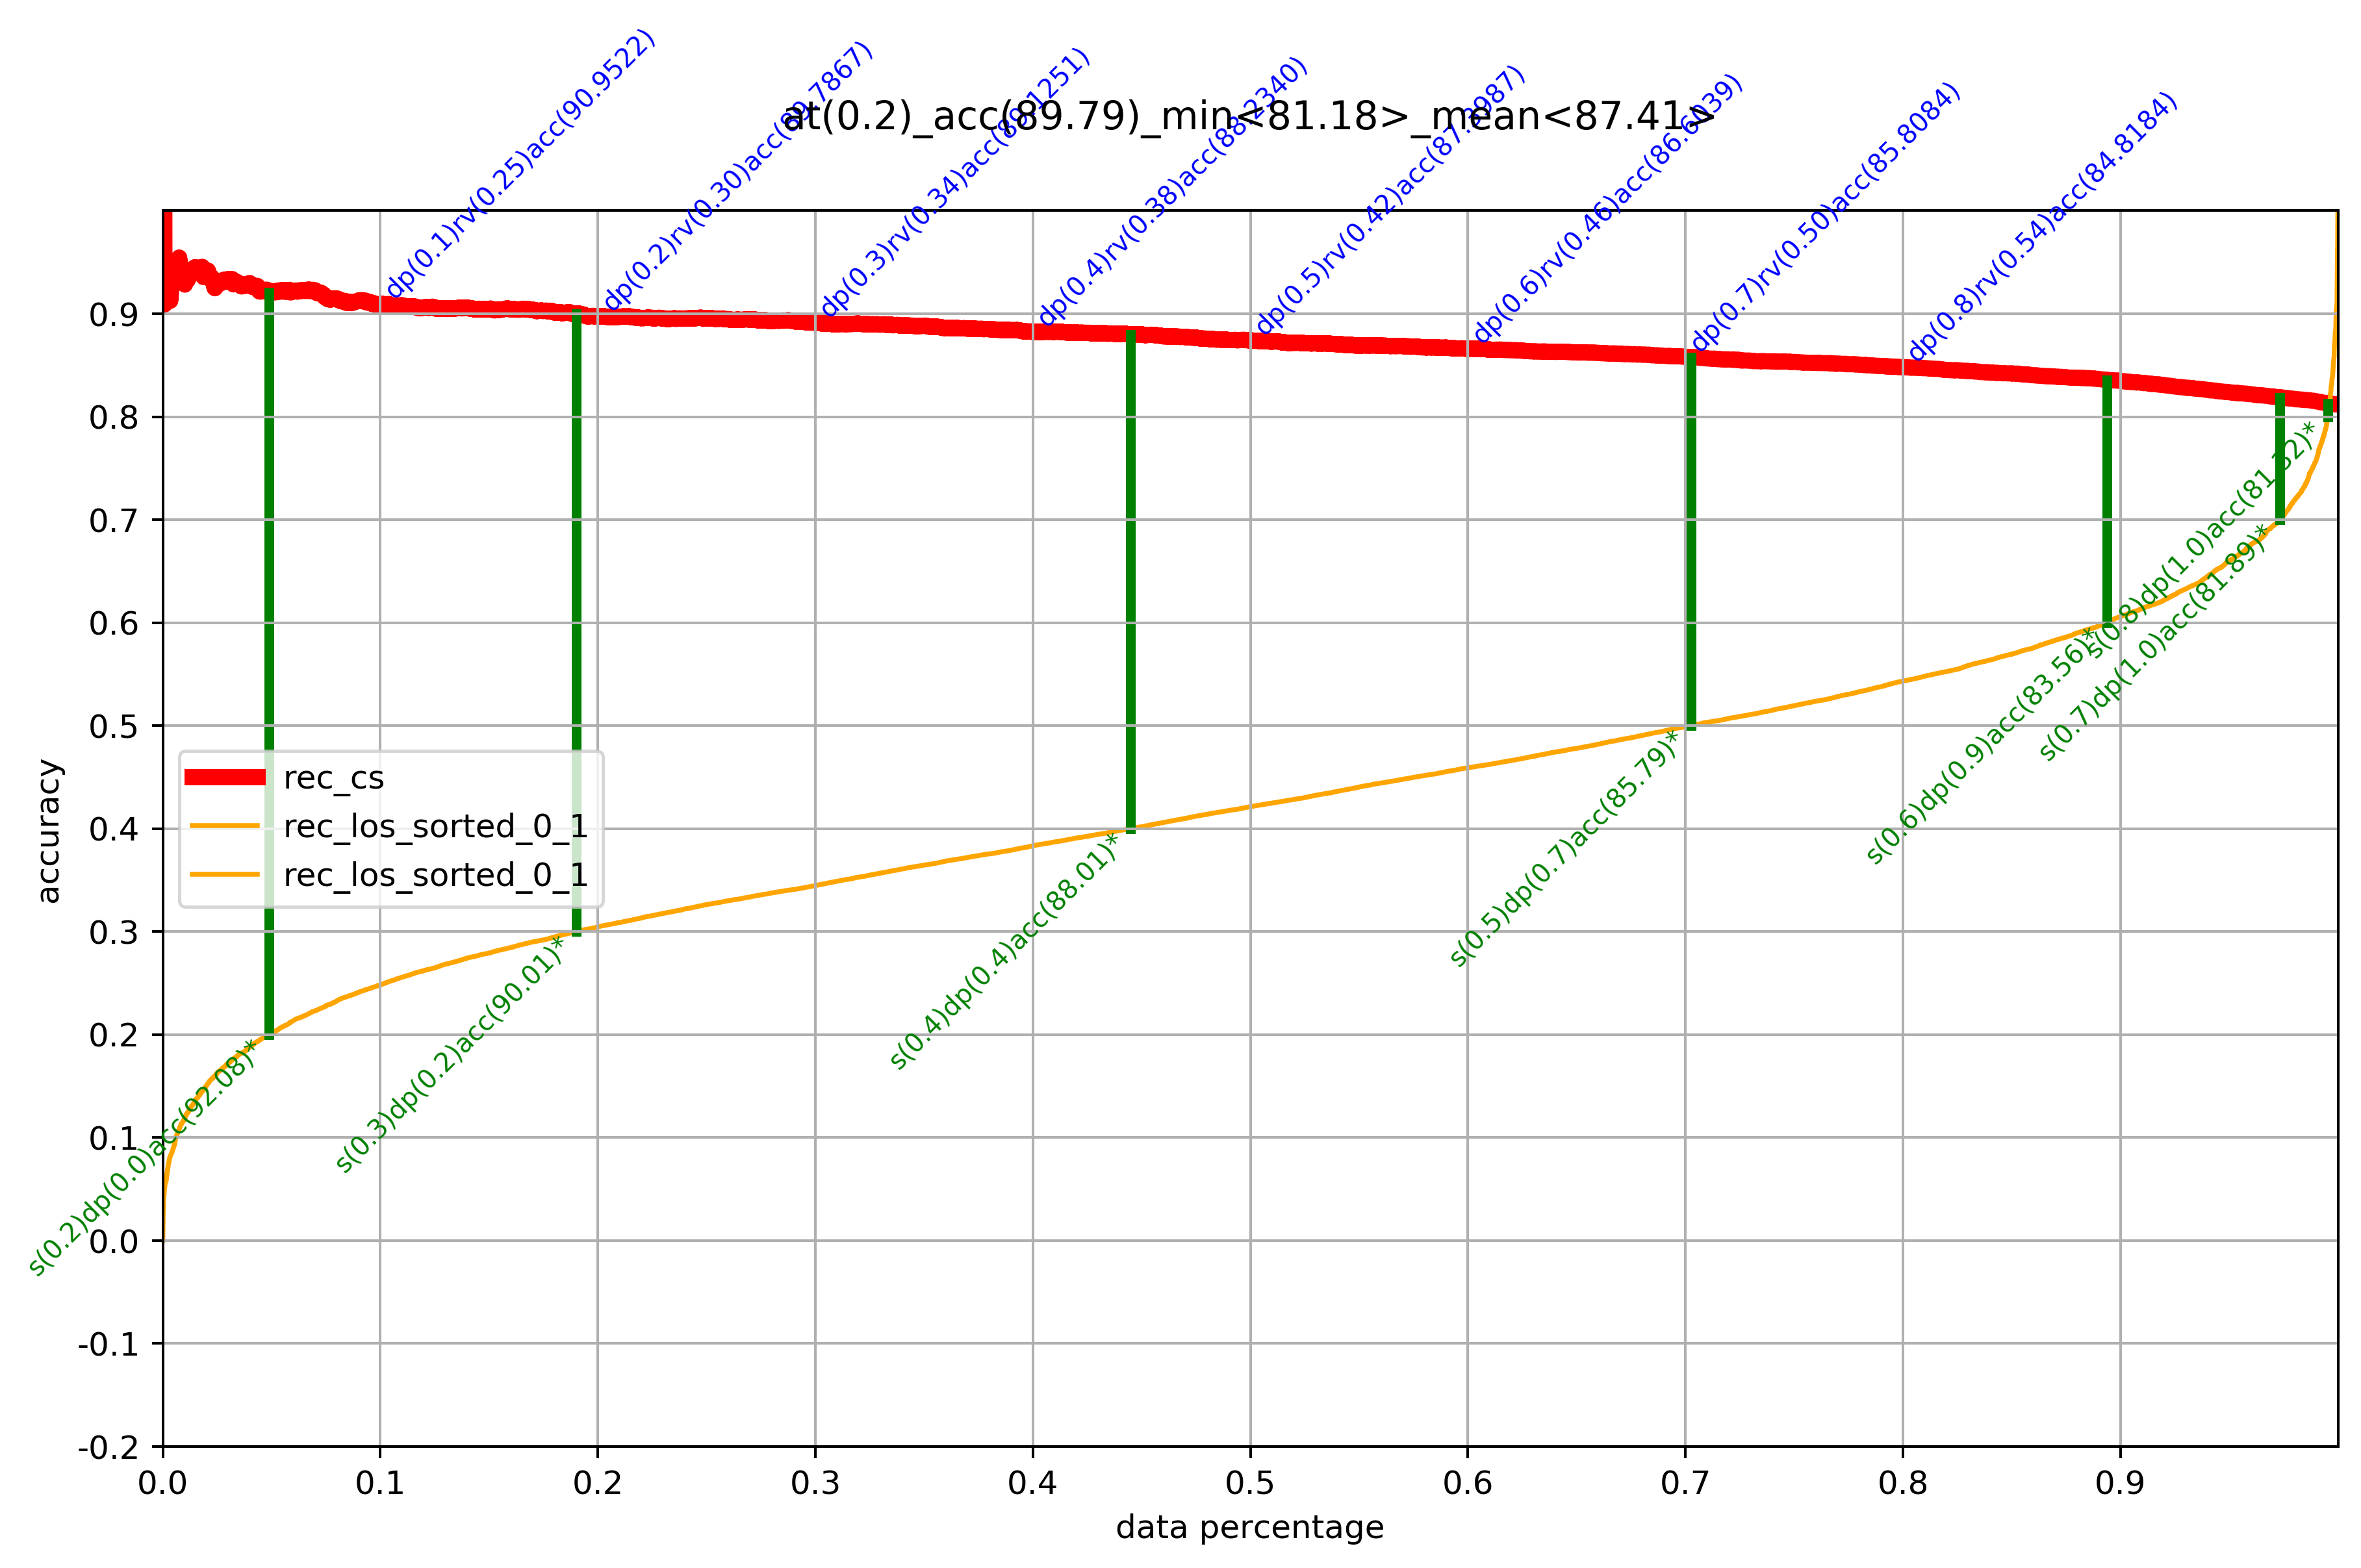

In [20]:
for ep_str in sil_var.keys():
    _evs = get_epoch(ep_str=ep_str)
    epoch_id = int(ep_str.replace("epoch", ""))
    save_at_file_name=os.path.join(exp_fold, "plots", "reconstruct_sort_{:03d}_ACCSTR.jpeg".format(epoch_id))
    prHF.analyze_reconstruction_values(reconstruction_loss_vec=_evs["reconstruction_loss"], 
                                  cluster_labels=_evs["predictions"], real_labels=_evs["labels"],
                                  centroid_info_pdf=_evs["kluster_centroids"], save_at_file_name=save_at_file_name,
                                  str_size=8, verbose=2)

In [22]:
sil_val = _evs["silhouette_values"]
sil_val_m = funcH.map_0_1(sil_val)
rec_los = _evs["reconstruction_loss"]
rec_los_m = funcH.map_0_1(rec_los)
cluster_labels=_evs["predictions"]
real_labels=_evs["labels"]
centroid_info_pdf=_evs["kluster_centroids"]
predictions_mapped = funcH.map_predictions(real_labels, cluster_labels, centroid_info_pdf=centroid_info_pdf)
print(np.min(sil_val), np.max(sil_val))
print(np.min(sil_val_m), np.max(sil_val_m))
print(np.min(rec_los), np.max(rec_los))
print(np.min(rec_los_m), np.max(rec_los_m))

-0.15170446 0.66033953
0.0 1.0
42.243317 87.92438
0.0 1.0


v_true: [51, 285, 963, 1856, 3185, 3607, 3620, 2923, 1821, 976, 370, 131, 28, 12, 1]
v_false: [0, 2, 34, 133, 314, 514, 571, 633, 553, 311, 186, 79, 33, 6, 3]


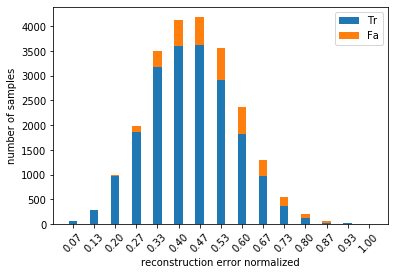

v_true: [25, 192, 820, 2025, 3007, 3109, 2935, 2636, 1974, 1352, 764, 518, 275, 94, 103]
v_false: [15, 109, 508, 901, 785, 546, 266, 117, 87, 14, 18, 6, 0, 0, 0]


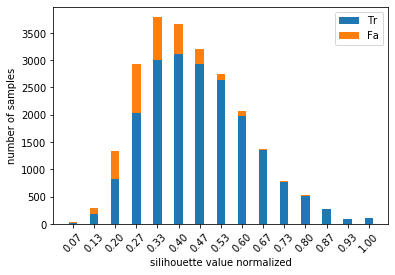

In [23]:
slice_cnt = 15
def get_inds_list(vec_0_1, slice_cnt, verbose=1):
    inds_list = {}
    #print(len(vec_0_1))
    area_blocks = np.linspace(0.0, 1.0, slice_cnt+1)
    for i in range(slice_cnt):
        if verbose>0:
            print("bigger equal({:3.2f}), less({:3.2f})".format(area_blocks[i], area_blocks[i+1]))
        block_inds = np.array([j for j, e in enumerate(vec_0_1) if (e>=area_blocks[i] and e<area_blocks[i+1])])
        #print(len(block_inds))
        inds_list["{:02d}".format(i)] = {"block_inds":block_inds, "from":area_blocks[i], "to":area_blocks[i+1]}
    return inds_list, area_blocks

def get_tf_counts(vec_0_1, vec_real, inds_list, tf_vec, verbose=1):
    v_true = []
    v_false= []
    for _k in inds_list.keys():
        _cl = inds_list[_k]
        block_inds = _cl["block_inds"]
        _fr = _cl["from"]
        _to = _cl["to"]
        t_cnt = 0 if len(block_inds)==0 else np.sum(tf_vec[block_inds]==1)
        f_cnt = 0 if len(block_inds)==0 else np.sum(tf_vec[block_inds]==0)
        #print("*:", len(block_inds), _fr, _to, "t(",t_cnt, "), f(", f_cnt, ")")
        v_true.append(t_cnt)
        v_false.append(f_cnt)
    print("v_true:", v_true)
    print("v_false:", v_false)
    return v_true, v_false

def plot_single_stacked_bar(v_true, v_false, area_blocks, x_label_str='', width = 0.40):
    #block diagram of how many correct and how many incorrect samples fall in blocks of rec error
    plt.close('all')
    labels = ["{:3.2f}".format(v) for v in area_blocks[1:]]
    fig, ax = plt.subplots()
    ax.bar(labels, v_true, width, label='Tr')
    ax.bar(labels, v_false, width, bottom = v_true, label='Fa')
    ax.set_xlabel(x_label_str + ' normalized')
    ax.set_ylabel('number of samples')
    ax.legend()
    plt.xticks(rotation=45)
    plt.show()

inds_list_rec, area_blocks = get_inds_list(rec_los_m, slice_cnt=slice_cnt, verbose=0)
v_true, v_false = get_tf_counts(rec_los_m, rec_los, inds_list_rec, predictions_mapped==real_labels)
plot_single_stacked_bar(v_true, v_false, area_blocks, x_label_str='reconstruction error', width = 0.40)

inds_list_sil, area_blocks = get_inds_list(sil_val_m, slice_cnt=slice_cnt, verbose=0)
v_true, v_false = get_tf_counts(sil_val_m, sil_val, inds_list_sil, predictions_mapped==real_labels)
plot_single_stacked_bar(v_true, v_false, area_blocks, x_label_str='silihouette value', width = 0.40)

In [24]:
impL.reload(funcH)
def get_tf_counts(vec_0_1_a, vec_0_1_b, inds_list_a, inds_list_b, tf_vec, verbose=1):
    cnt_mat_true = np.zeros((len(inds_list_a), len(inds_list_b)), dtype=int)
    cnt_mat_fals = np.zeros((len(inds_list_a), len(inds_list_b)), dtype=int)
    cnt_mat_prc  = np.zeros((len(inds_list_a), len(inds_list_b)), dtype=float)
    _a=0
    for _ka in inds_list_a.keys():
        block_inds_a = inds_list_a[_ka]["block_inds"]
        _b=0
        for _kb in inds_list_b.keys():
            block_inds_b = inds_list_b[_kb]["block_inds"]
            block_inds = funcH.intersection(block_inds_a, block_inds_b)            
            cnt_mat_true[_a, _b] = 0 if len(block_inds)==0 else np.sum(tf_vec[block_inds]==1)
            cnt_mat_fals[_a, _b] = 0 if len(block_inds)==0 else np.sum(tf_vec[block_inds]==0)
            if cnt_mat_fals[_a, _b] > 0:
                cnt_mat_prc[_a, _b] = cnt_mat_true[_a, _b]/cnt_mat_fals[_a, _b]
            elif cnt_mat_true[_a, _b] > 0:
                cnt_mat_prc[_a, _b] = float('NaN')
            else:
                cnt_mat_prc[_a, _b] = 0.0
            _b += 1
        _a += 1
    cnt_mat_prc[np.isnan(cnt_mat_prc)] = np.nanmean(cnt_mat_prc)
    return cnt_mat_true, cnt_mat_fals, cnt_mat_prc

In [25]:
cnt_mat_true, cnt_mat_fals, cnt_mat_prc = get_tf_counts(rec_los_m, sil_val_m, inds_list_rec, inds_list_sil, predictions_mapped==real_labels, verbose=1)

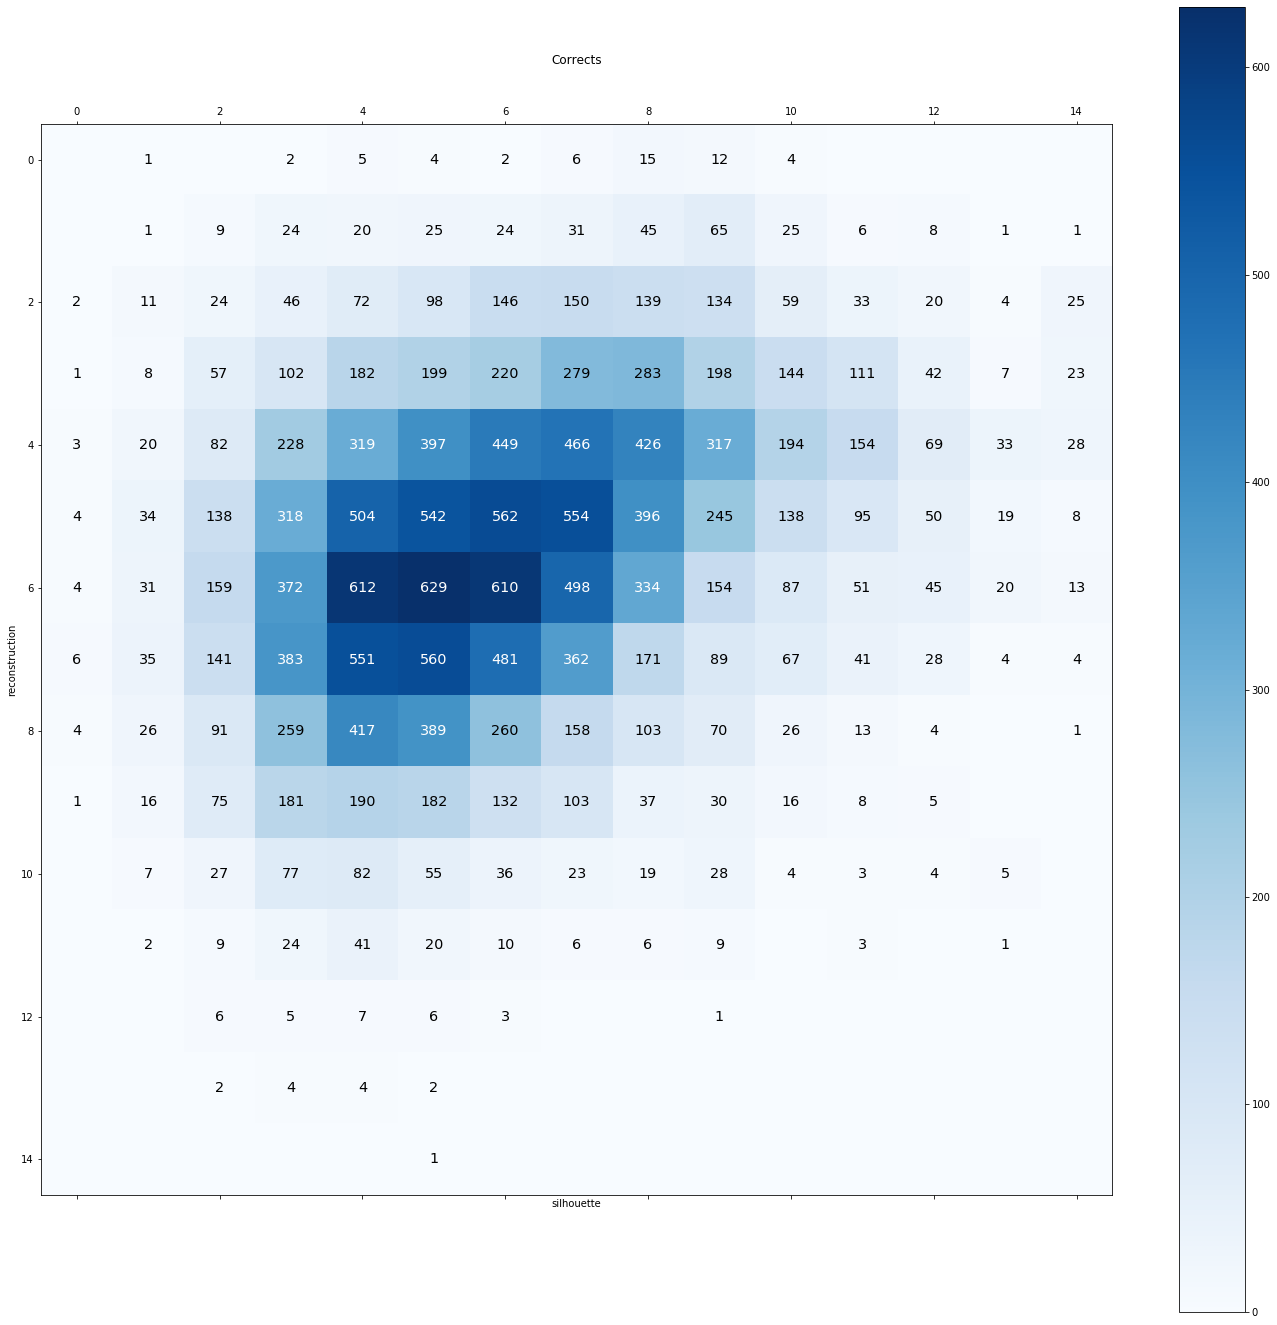

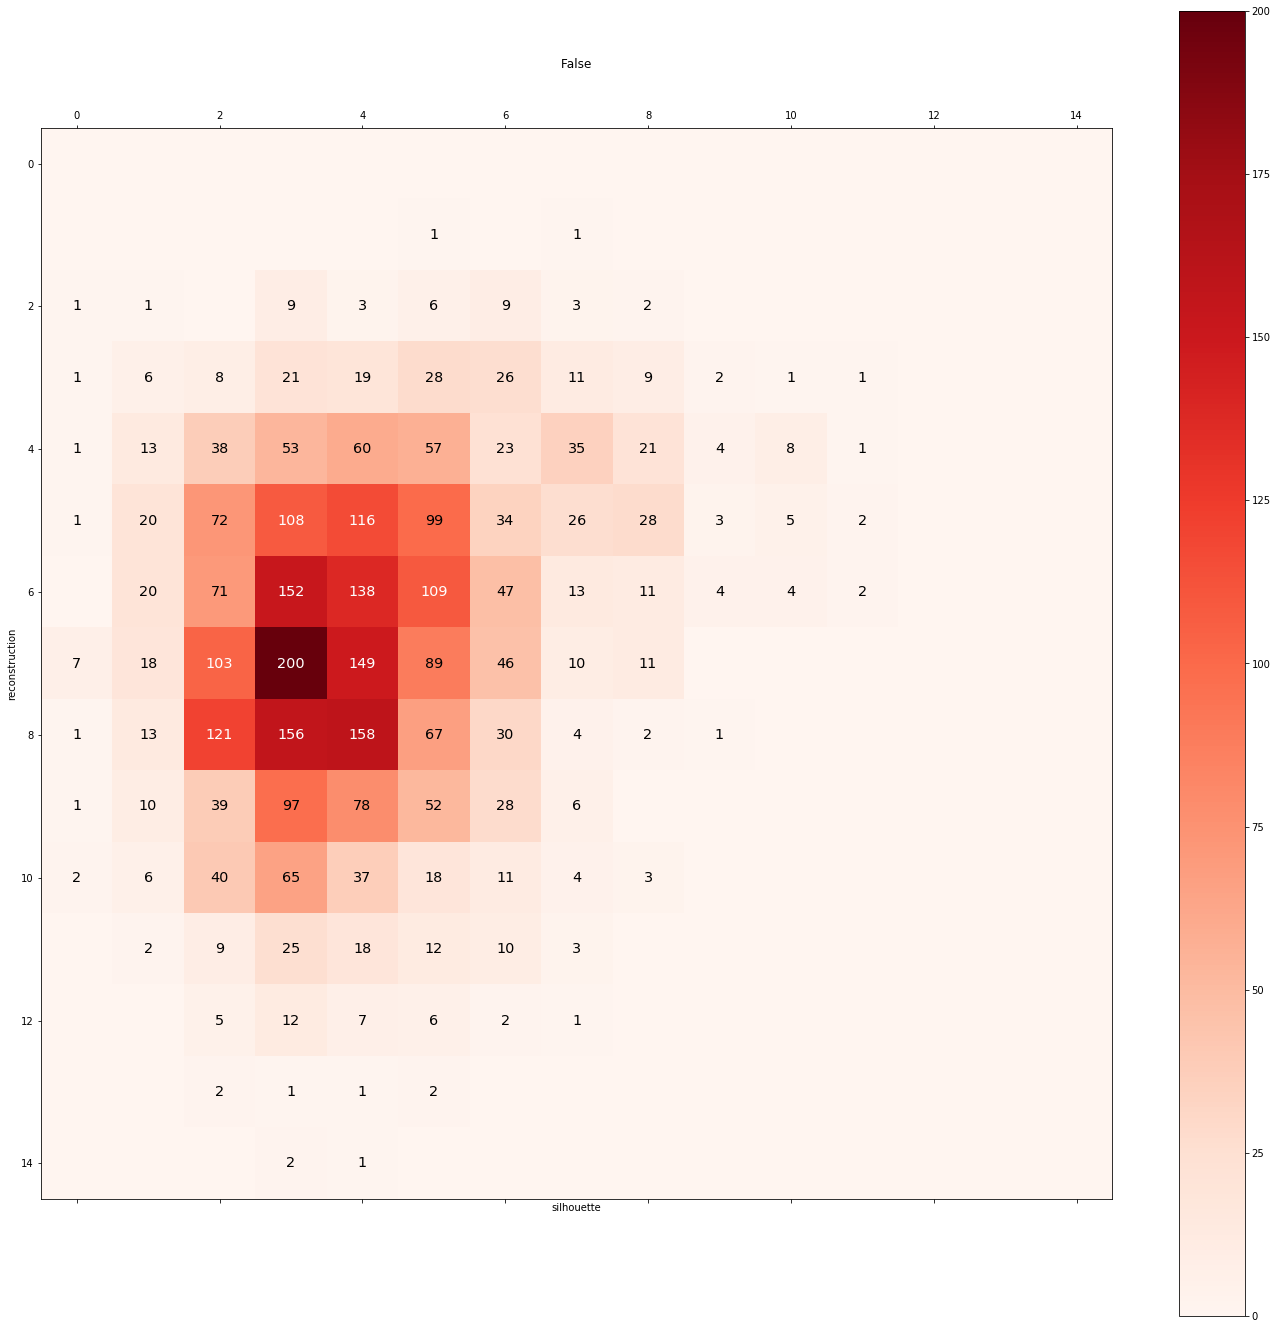

In [26]:
def plot_rec_silh_intersect_vals(conf_mat, title_str='', figsize=(24,24), cmap = plt.cm.Blues, _val_char='d', max_allowed=None):
    fig, ax = plt.subplots(figsize=figsize)
    ax.grid(False)
    if max_allowed is not None:
        conf_mat[conf_mat>max_allowed] = max_allowed
    matshow = ax.matshow(conf_mat, cmap=cmap)
    fig.colorbar(matshow)
    for i in range(conf_mat.shape[0]):
        for j in range(conf_mat.shape[1]):
            cell_text = ""
            if conf_mat[i, j] > 0:
                cell_text += format(conf_mat[i, j], _val_char)
            text_color = "white" if conf_mat[i, j] > np.max(conf_mat) / 2 else "black"
            ax.text(x=j, y=i,
                    s=cell_text,
                    va='center', ha='center',
                    color=text_color, fontsize='x-large')
    ax.set_xlabel('silhouette')
    ax.set_ylabel('reconstruction')
    plt.title(title_str)
    
plot_rec_silh_intersect_vals(conf_mat=cnt_mat_true, title_str='Corrects', figsize=(24,24), cmap = plt.cm.Blues)
plot_rec_silh_intersect_vals(conf_mat=cnt_mat_fals, title_str='False',figsize=(24,24), cmap = plt.cm.Reds)

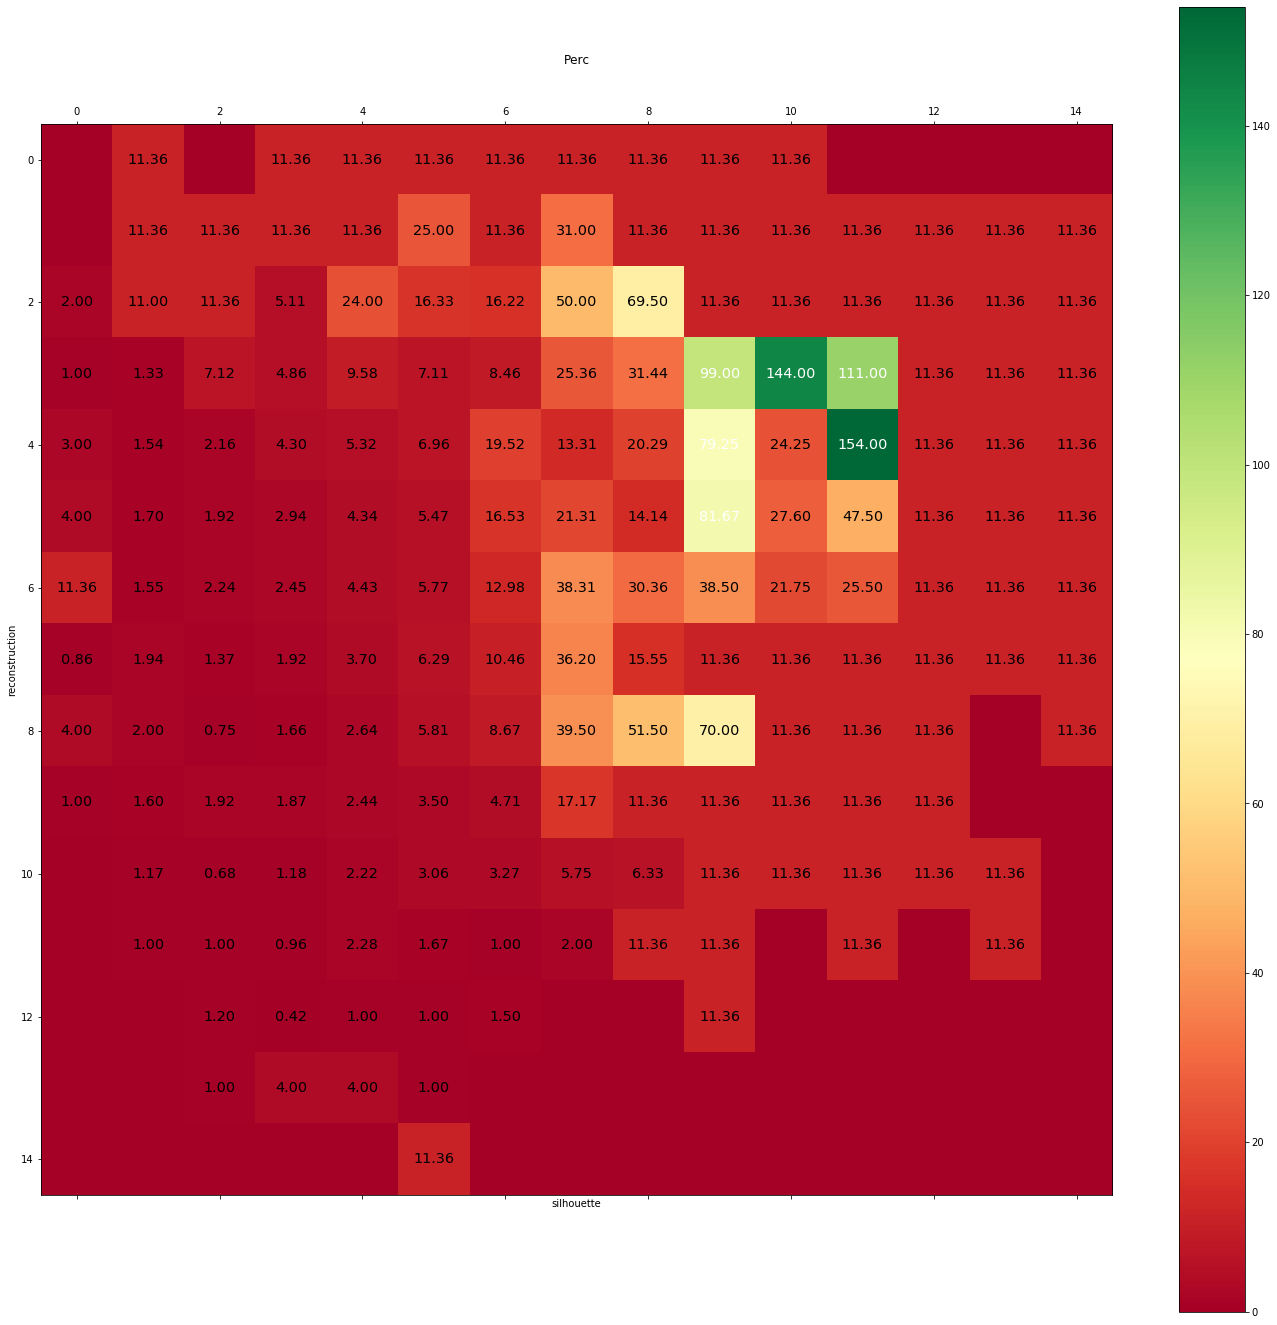

In [27]:
plot_rec_silh_intersect_vals(conf_mat=cnt_mat_prc.copy(), title_str='Perc',figsize=(24,24), cmap = plt.cm.RdYlGn, _val_char='3.2f', max_allowed=None)